![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 4: Network Analysis</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

In [1]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community
import pandas

plt.rc("savefig", dpi=300) # improve default resolution of graphics
sns.set(font_scale=.75)

/Users/johnmclevey/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)
RC1014 = RC.yearSplit(2010,2014)

## Co-Author Networks

* produce network from record collection
* get quick stats

In [3]:
coauth_net = RC.networkCoAuthor() 
print(mk.graphStats(coauth_net))

Nodes: 10104
Edges: 15507
Isolates: 1111
Self loops: 0
Density: 0.000303818
Transitivity: 0.555409


* modify network object in memory by dropping edges and self-loops
* modify network object by extracting the giant component (e.g. of *networkx*)

In [4]:
mk.dropEdges(coauth_net, minWeight = 2, dropSelfLoops = True) 
giant_coauth = max(nx.connected_component_subgraphs(coauth_net), key=len)
print(mk.graphStats(giant_coauth))

Nodes: 265
Edges: 443
Isolates: 0
Self loops: 0
Density: 0.0126644
Transitivity: 0.285714


Of course we can use other *networkx* functions, such as computing centralities and global network properties.

In [5]:
deg = nx.degree_centrality(giant_coauth)
eig = nx.eigenvector_centrality(giant_coauth)

In [7]:
cent_df = pandas.DataFrame.from_dict([deg, eig])
cent_df = pandas.DataFrame.transpose(cent_df)
cent_df.columns = ['degree', 'eigenvector']
cent_df[:10]

degree   eigenvector
Abrizah, A.               0.007576  2.247156e-05
Albarran, Pedro           0.011364  5.906076e-07
Archambault, Eric         0.011364  1.818886e-04
Arencibia-Jorge, Ricardo  0.003788  4.431288e-04
Arora, Sanjay K.          0.007576  1.219429e-05
Arsenault, Clement        0.007576  3.405122e-05
Bar-Ilan, Judit           0.022727  2.385037e-05
Barjak, Franz             0.003788  2.244758e-05
Barnett, George A.        0.003788  1.801193e-03
Bauer, Johann             0.003788  3.188824e-02

/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


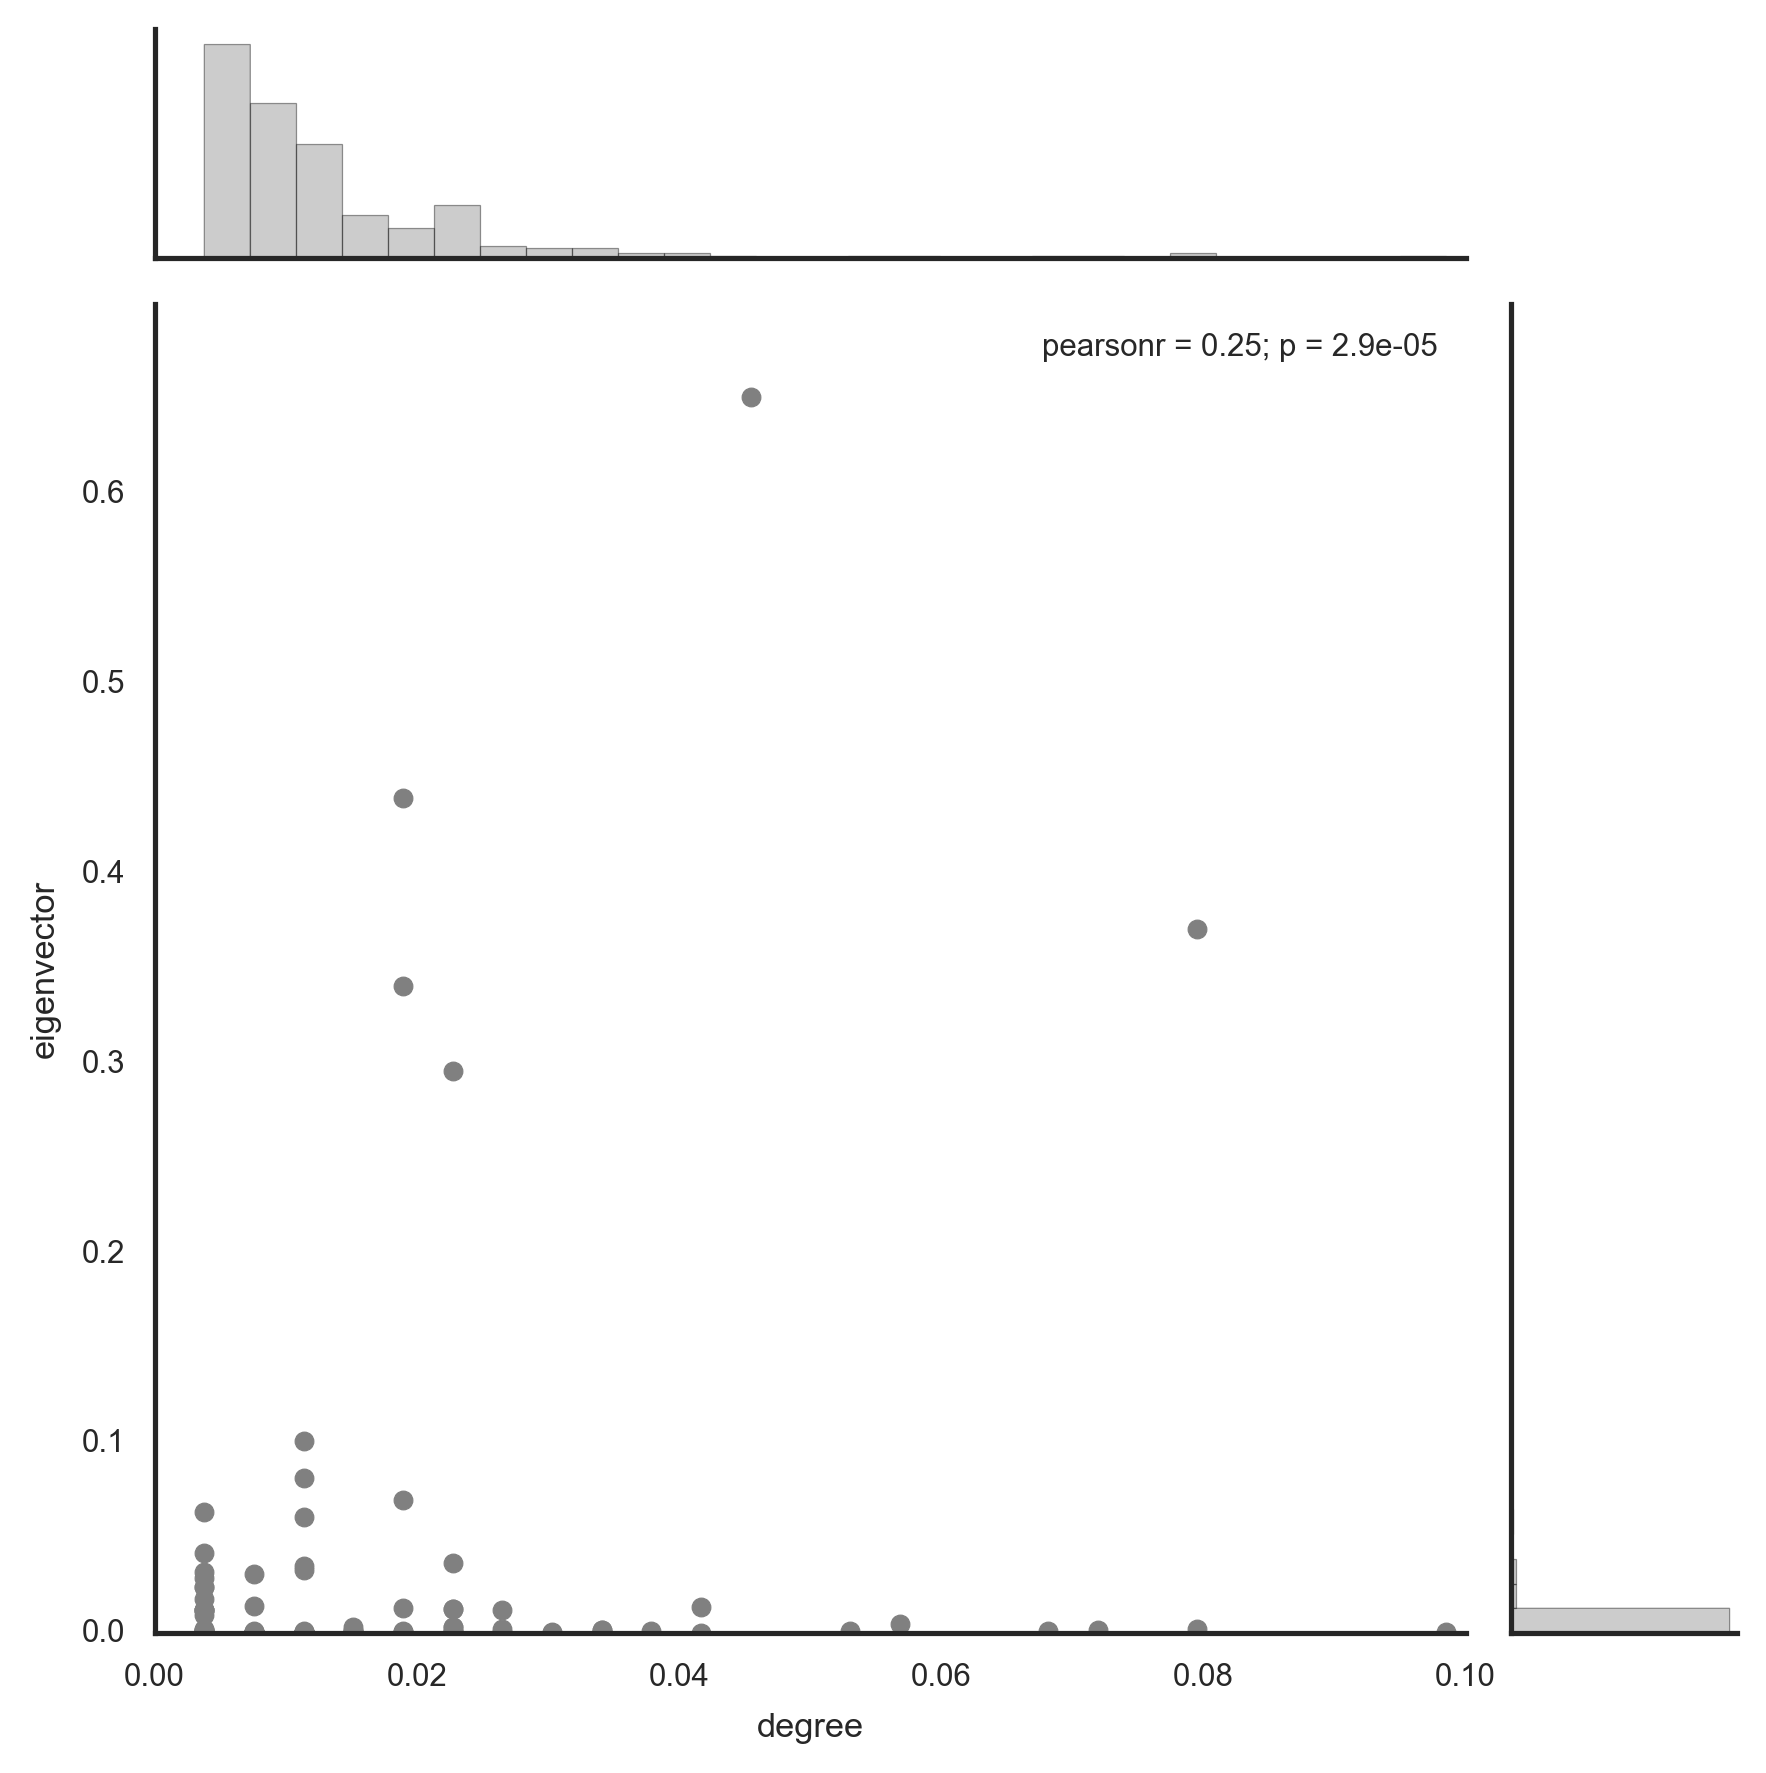

In [8]:
with sns.axes_style('white'):
    sns.jointplot(x='degree', y='eigenvector', data=cent_df, xlim = (0, .1), ylim = (0, .7), color = 'gray')
    sns.despine()
plt.savefig('figures/cent_scatterplot.pdf')

*Networkx* does an adequete job of creating static visualizations of networks, provided they are not too large.

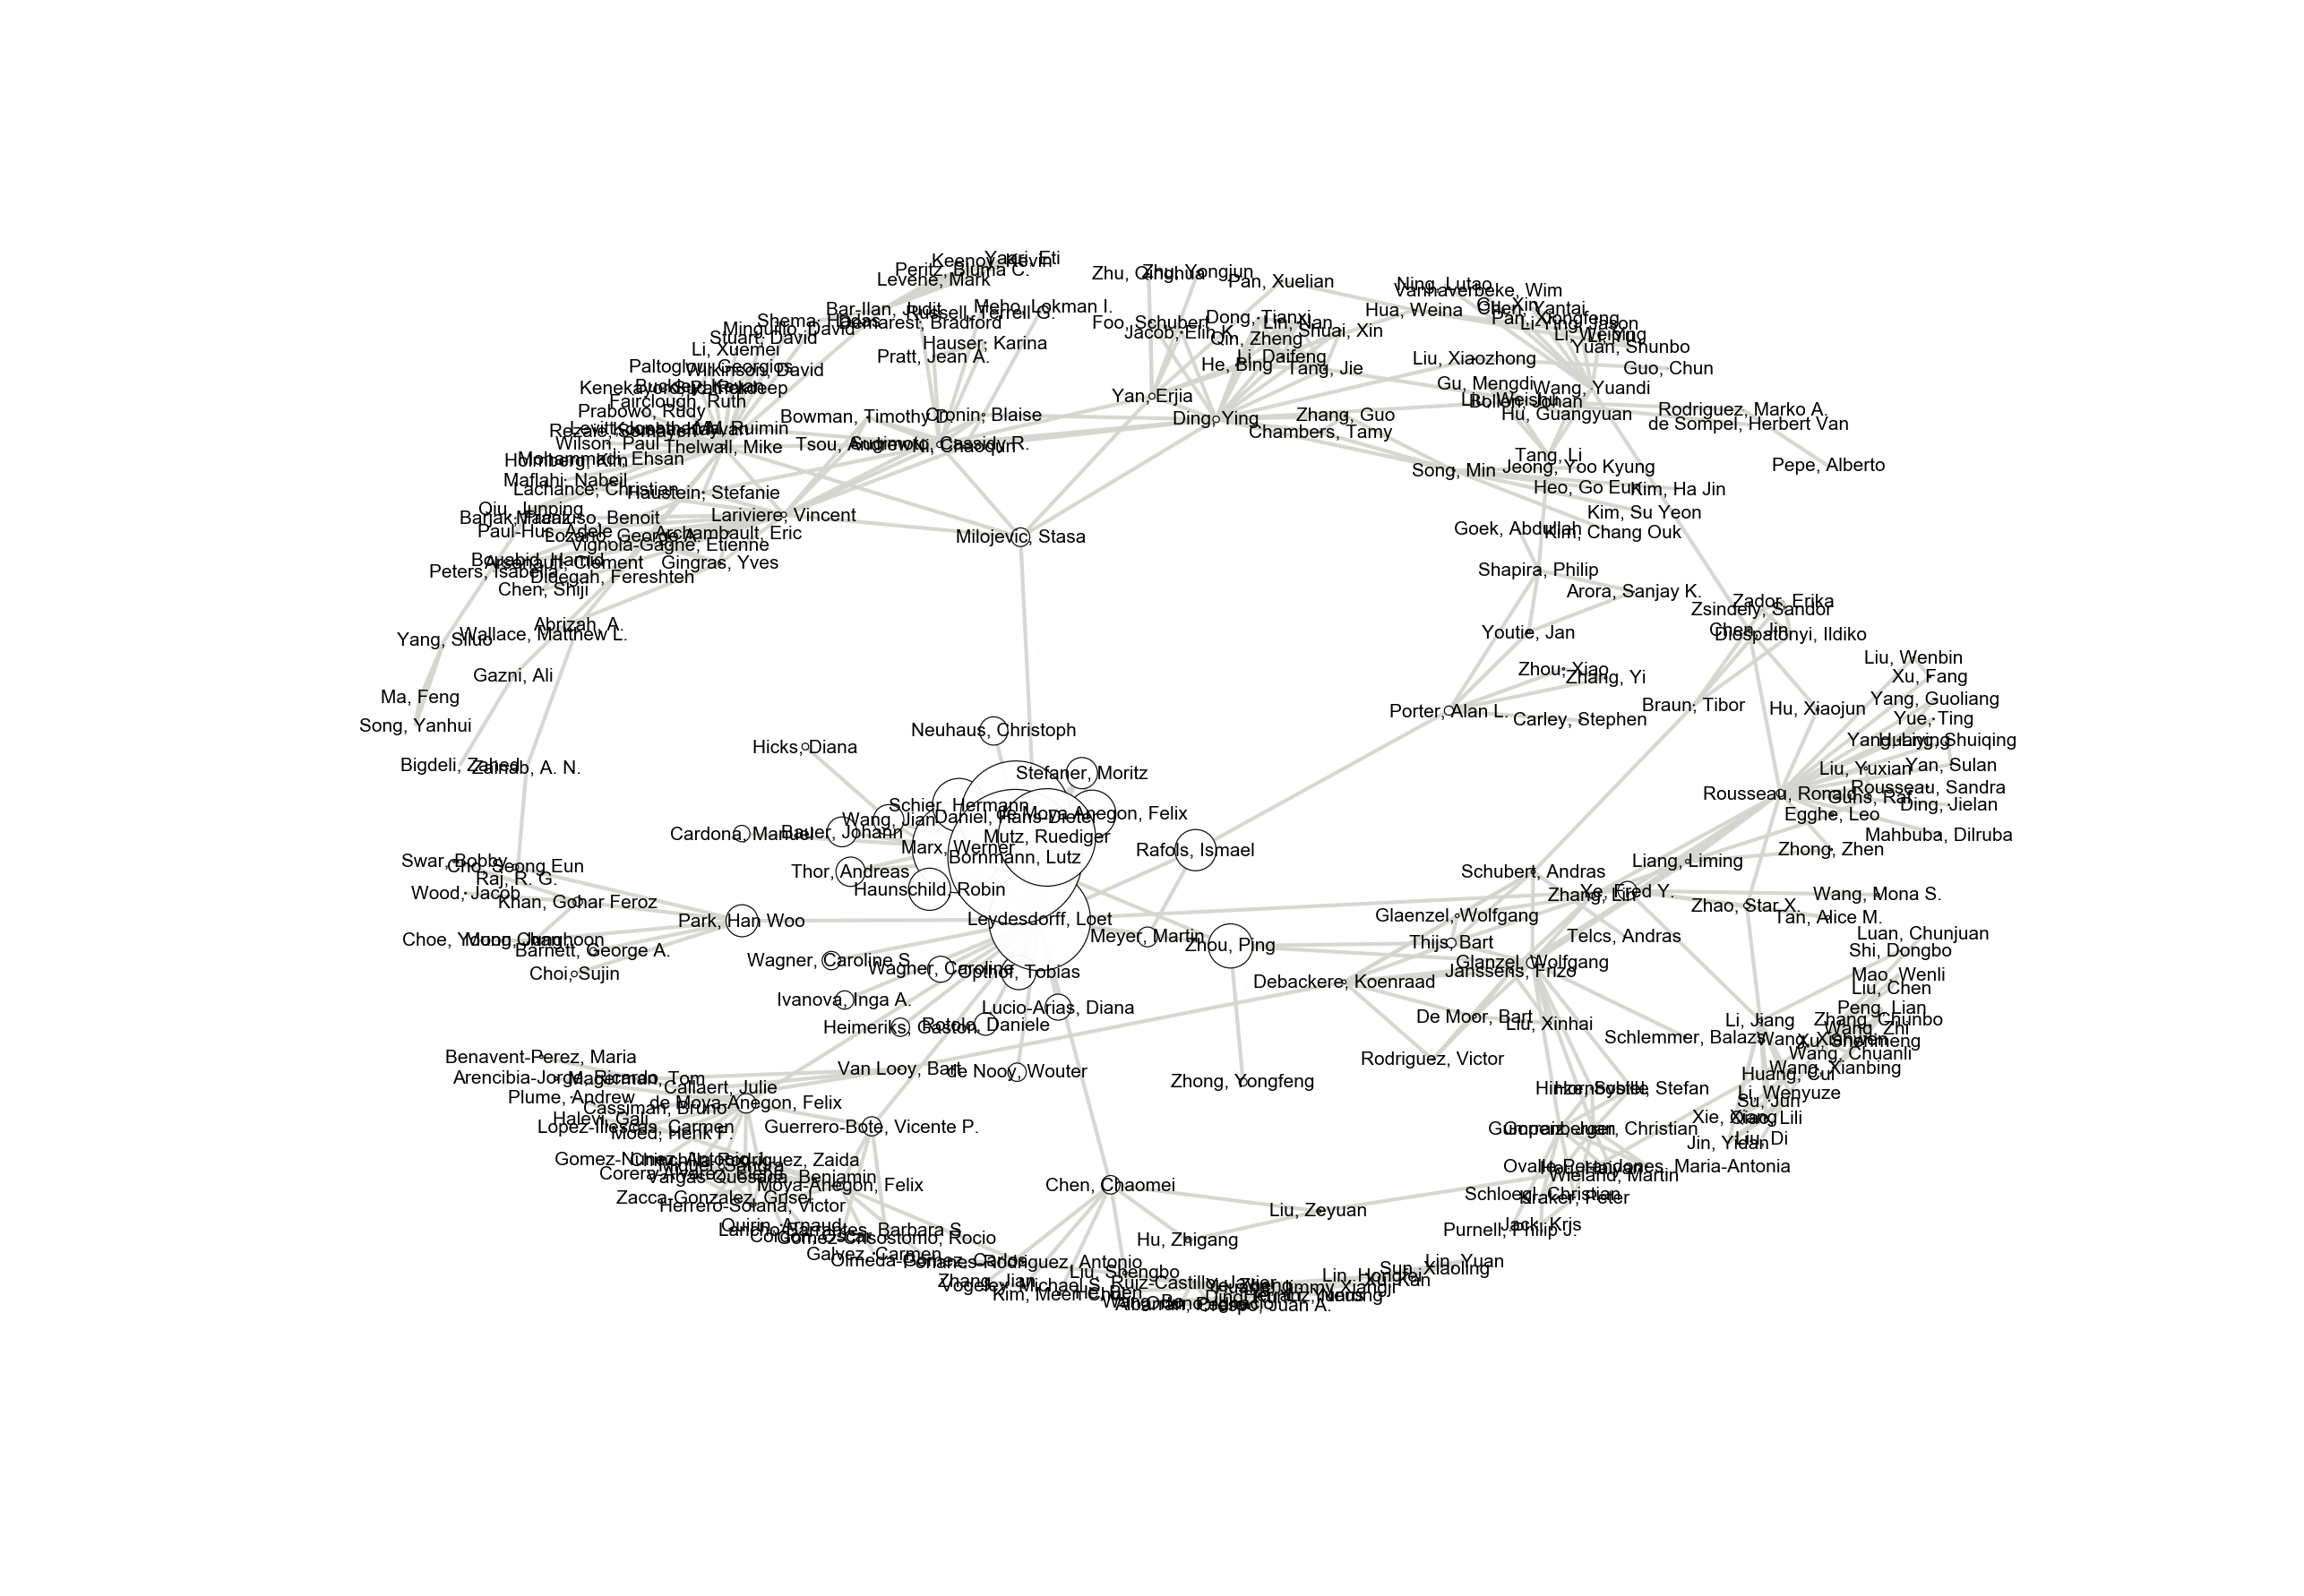

In [9]:
eig = nx.eigenvector_centrality(giant_coauth)
size = [2000 * eig[node] for node in giant_coauth]

nx.draw_spring(giant_coauth, node_size = size, with_labels = True, font_size = 5, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_coauthors.pdf')

* use the *community* package to compute modularity and detect community structure in the network

In [10]:
partition = community.best_partition(giant_coauth)
modularity = community.modularity(partition, giant_coauth) 
print('Modularity:', modularity)

Modularity: 0.8388786055513158


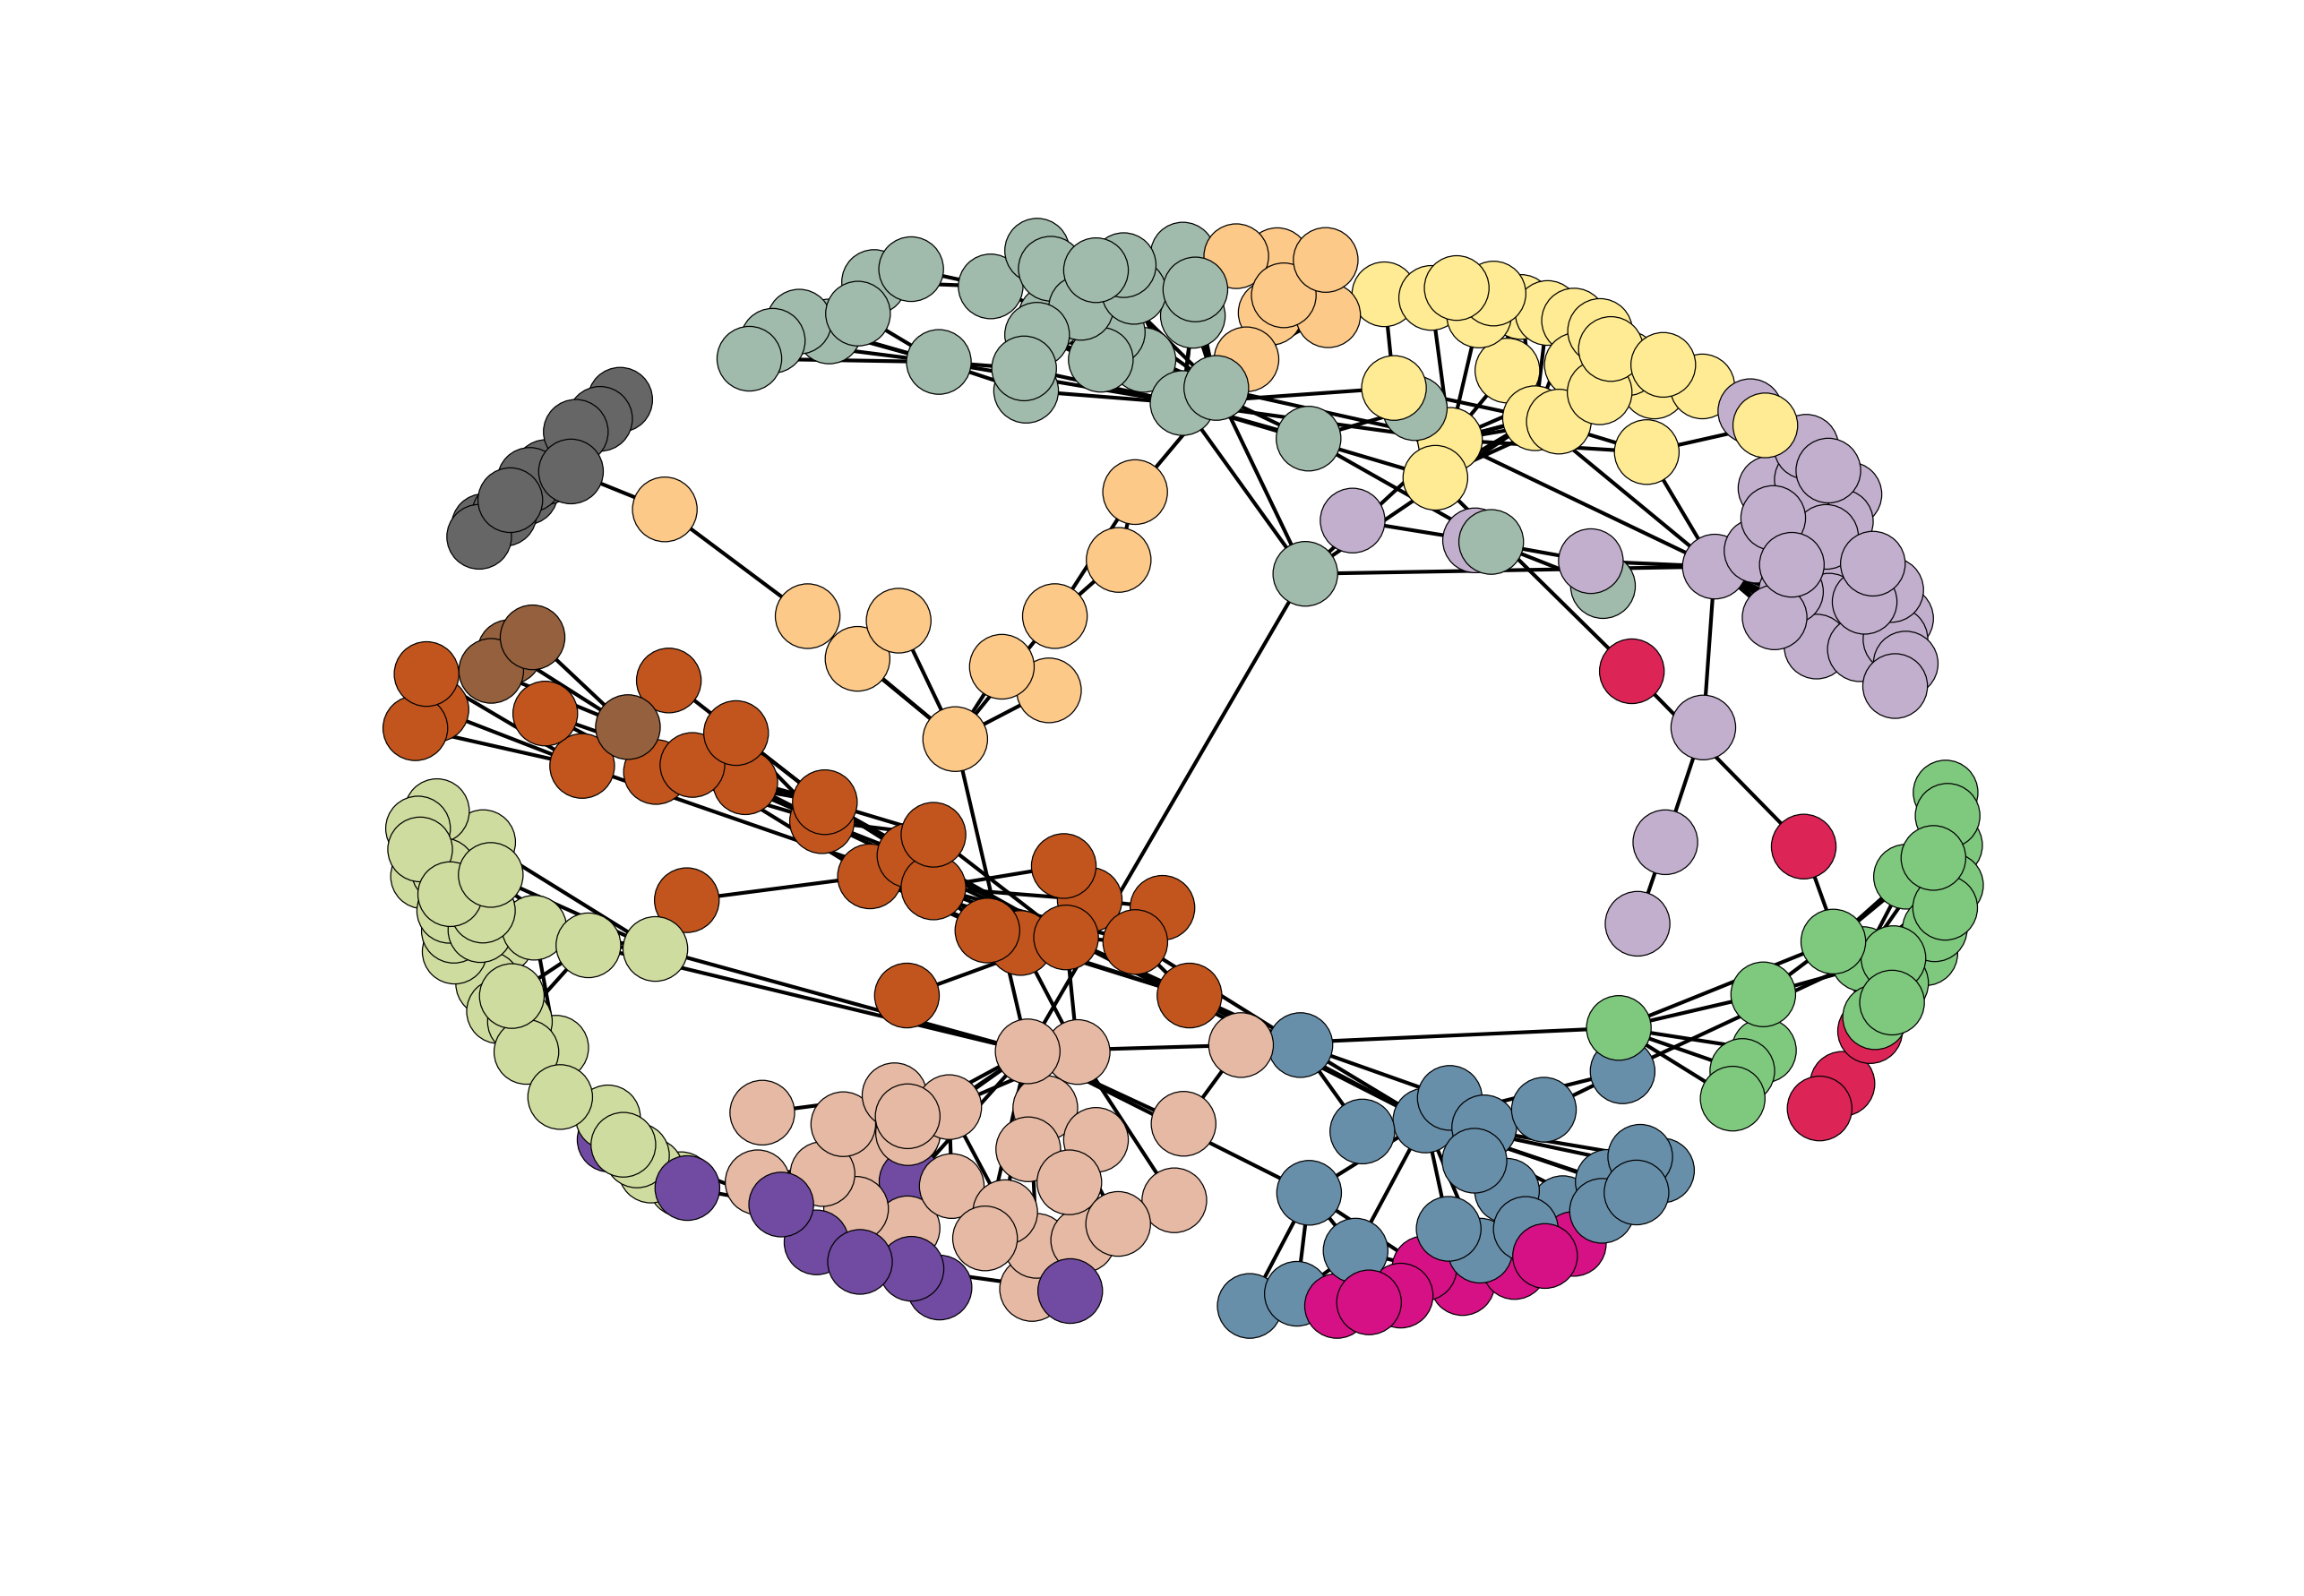

In [11]:
colors = [partition[n] for n in giant_coauth.nodes()] 
nx.draw_spring(giant_coauth, node_color=colors , cmap=plt.cm.Accent)
plt.savefig('figures/coauthors_community.pdf')

# Co-Citation

In [12]:
journal_cocite = RC1014.networkCoCitation(coreOnly = True) 
mk.dropEdges(journal_cocite , minWeight = 3)
print(mk.graphStats(journal_cocite))

Nodes: 1261
Edges: 1119
Isolates: 889
Self loops: 21
Density: 0.00140856
Transitivity: 0.300846


In [13]:
# visualize the giant component only
giantJournal = max(nx.connected_component_subgraphs(journal_cocite), key=len)

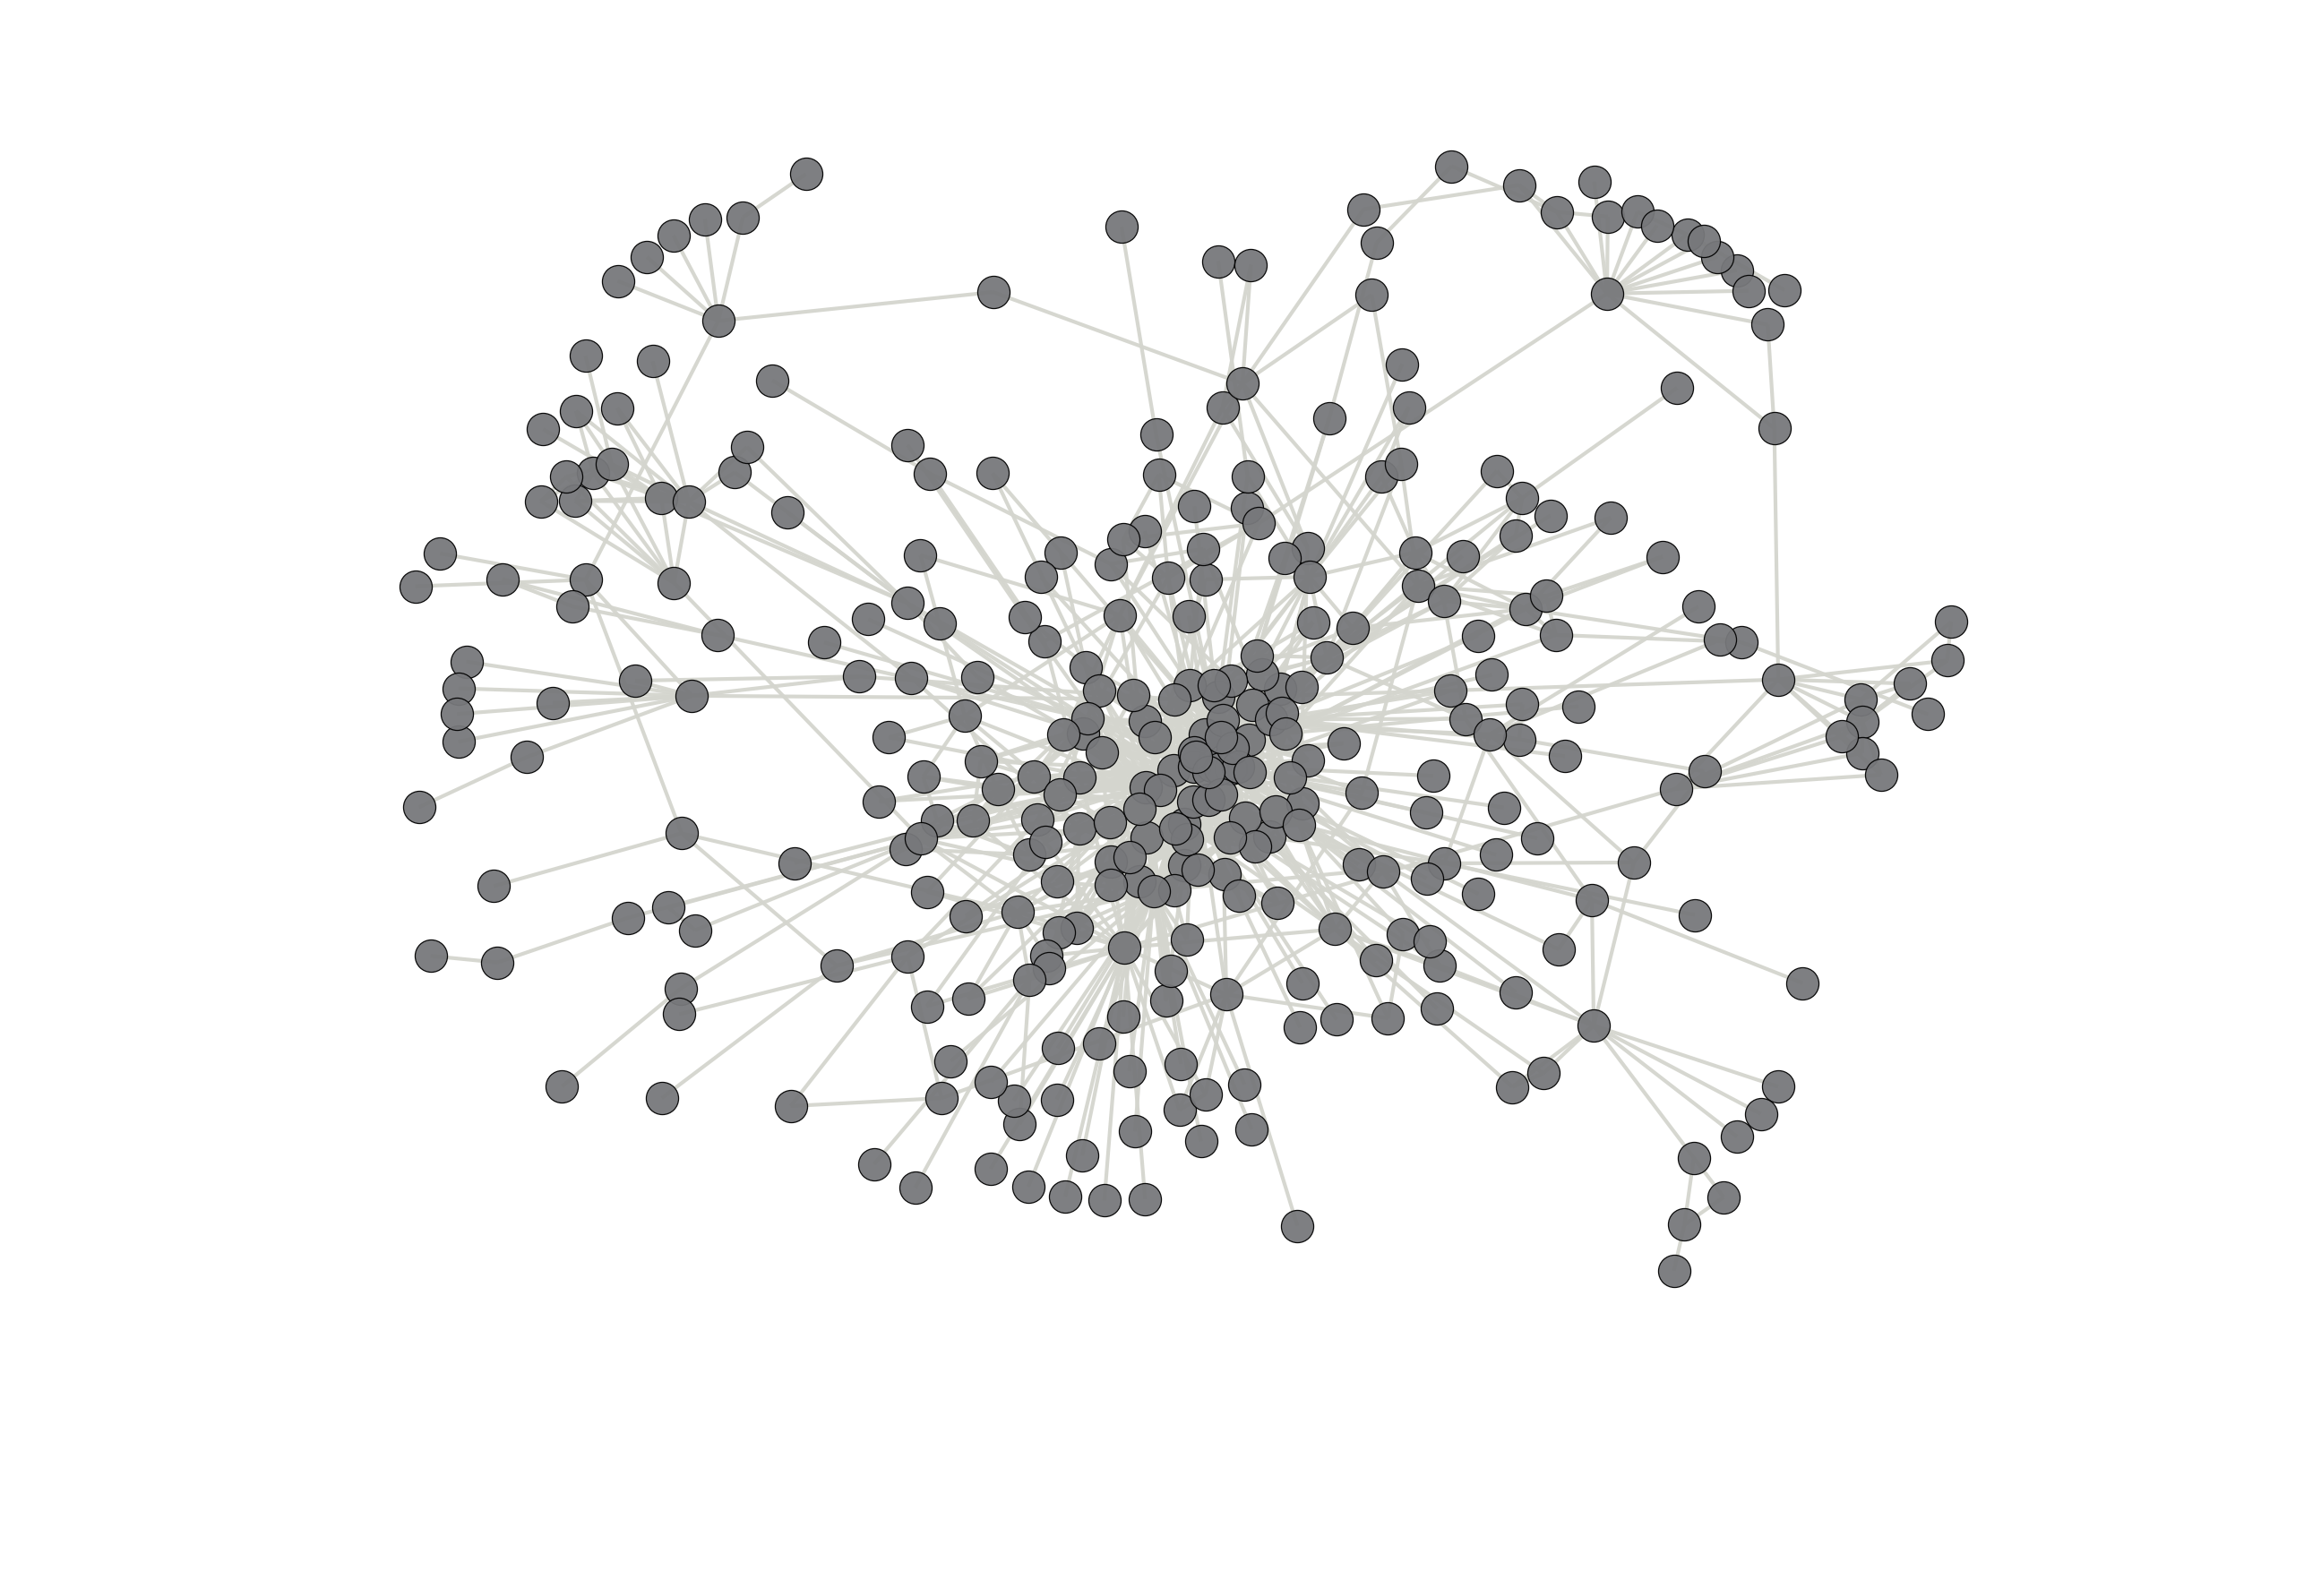

In [14]:
nx.draw_spring(giantJournal, with_labels = False, node_size = 75, 
              node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_journal_cocite.pdf')

Modularity: 0.8388786055513158


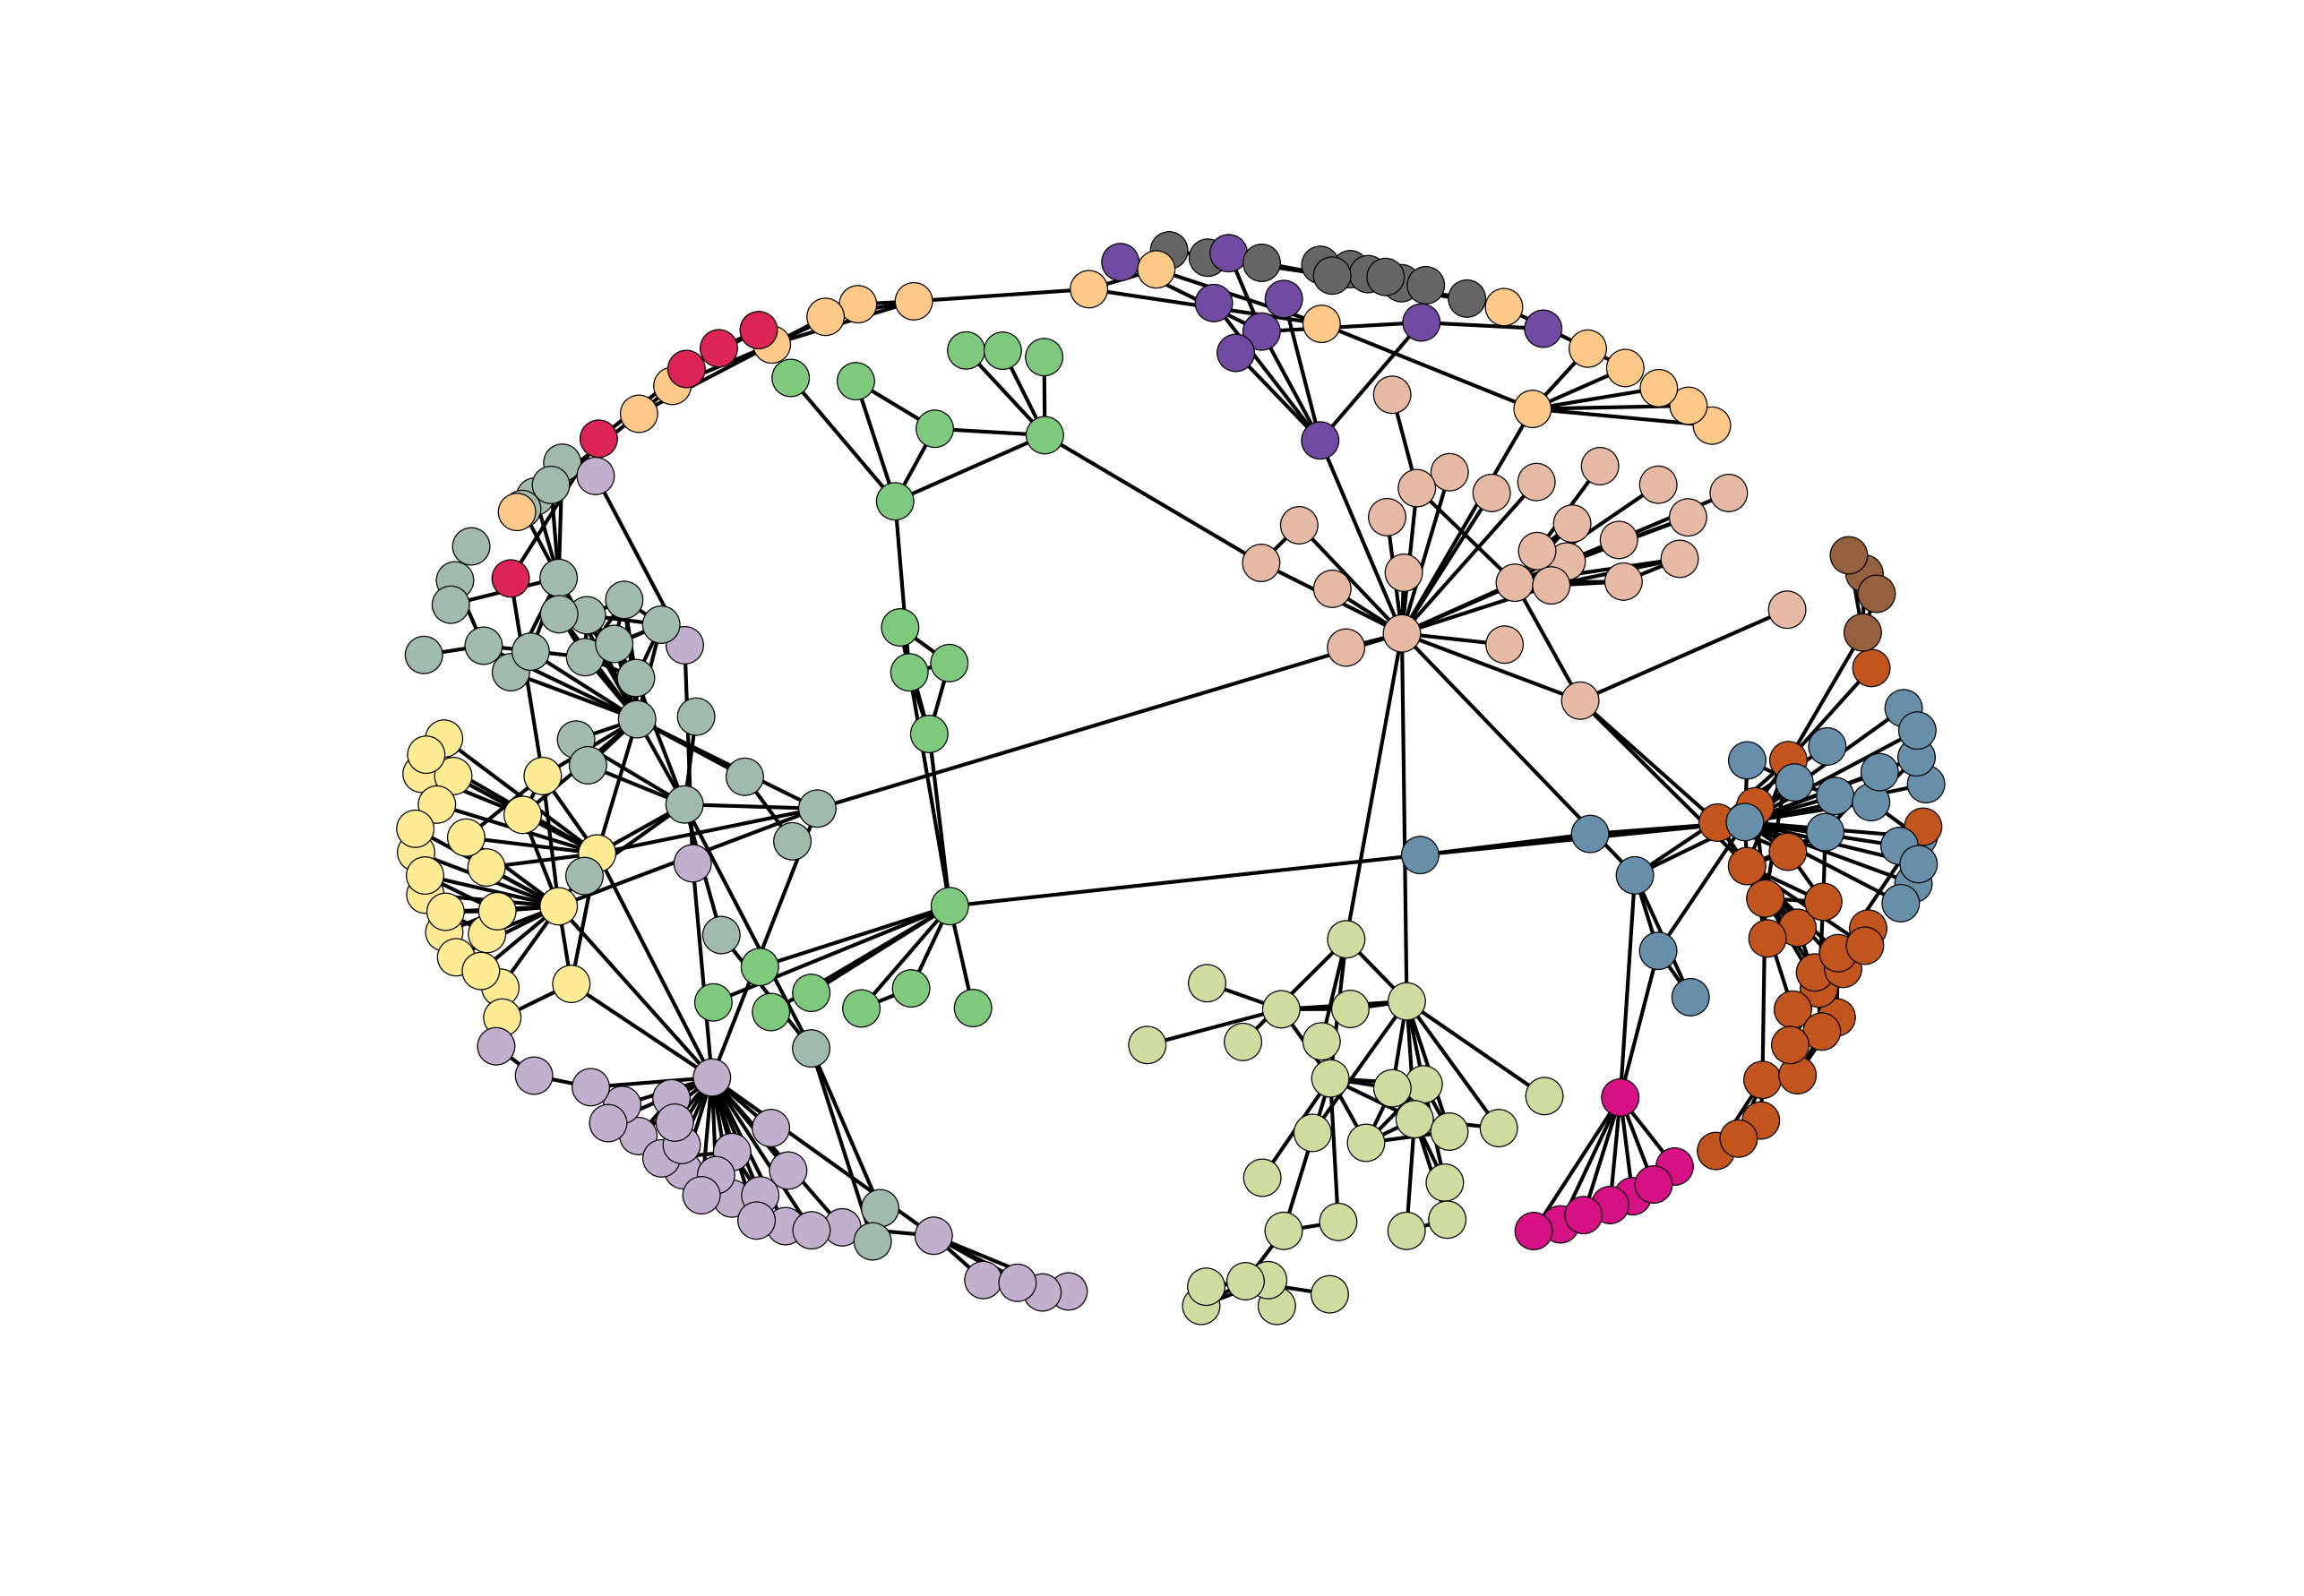

In [18]:
partition = community.best_partition(giant_coauth) 
modularity = community.modularity(partition, giant_coauth) 
print('Modularity:', modularity)

colors = [partition[n] for n in giant_coauth.nodes()] 
nx.draw_spring(giant_coauth, node_color=colors, with_labels = False, cmap=plt.cm.Accent, node_size = 100)
plt.savefig('figures/network_journal_cocite_community.pdf')

# Co-Investigator Networks

In [22]:
nserc_grants = mk.GrantCollection('raw_data/grants/nserc/')
print('There are', len(nserc_grants), 'Grants in this Grant Collection.')

There are 71184 Grants in this Grant Collection.


In [23]:
ci_nets = nserc_grants.networkCoInvestigator()
print(mk.graphStats(ci_nets))

Nodes: 33655
Edges: 130586
Isolates: 26284
Self loops: 4
Density: 0.00023059
Transitivity: 0.902158


For this example, we can restrict this network to recurring collaborations within the giant component. This makes plotting easier. In a real research example, you would likely make a different decision. 

In [24]:
mk.dropEdges(ci_nets, minWeight = 4)
giant_ci = max(nx.connected_component_subgraphs(ci_nets), key=len)
print(mk.graphStats(giant_ci))

Nodes: 250
Edges: 680
Isolates: 0
Self loops: 0
Density: 0.0218474
Transitivity: 0.679722


Modularity: 0.8521804432230575


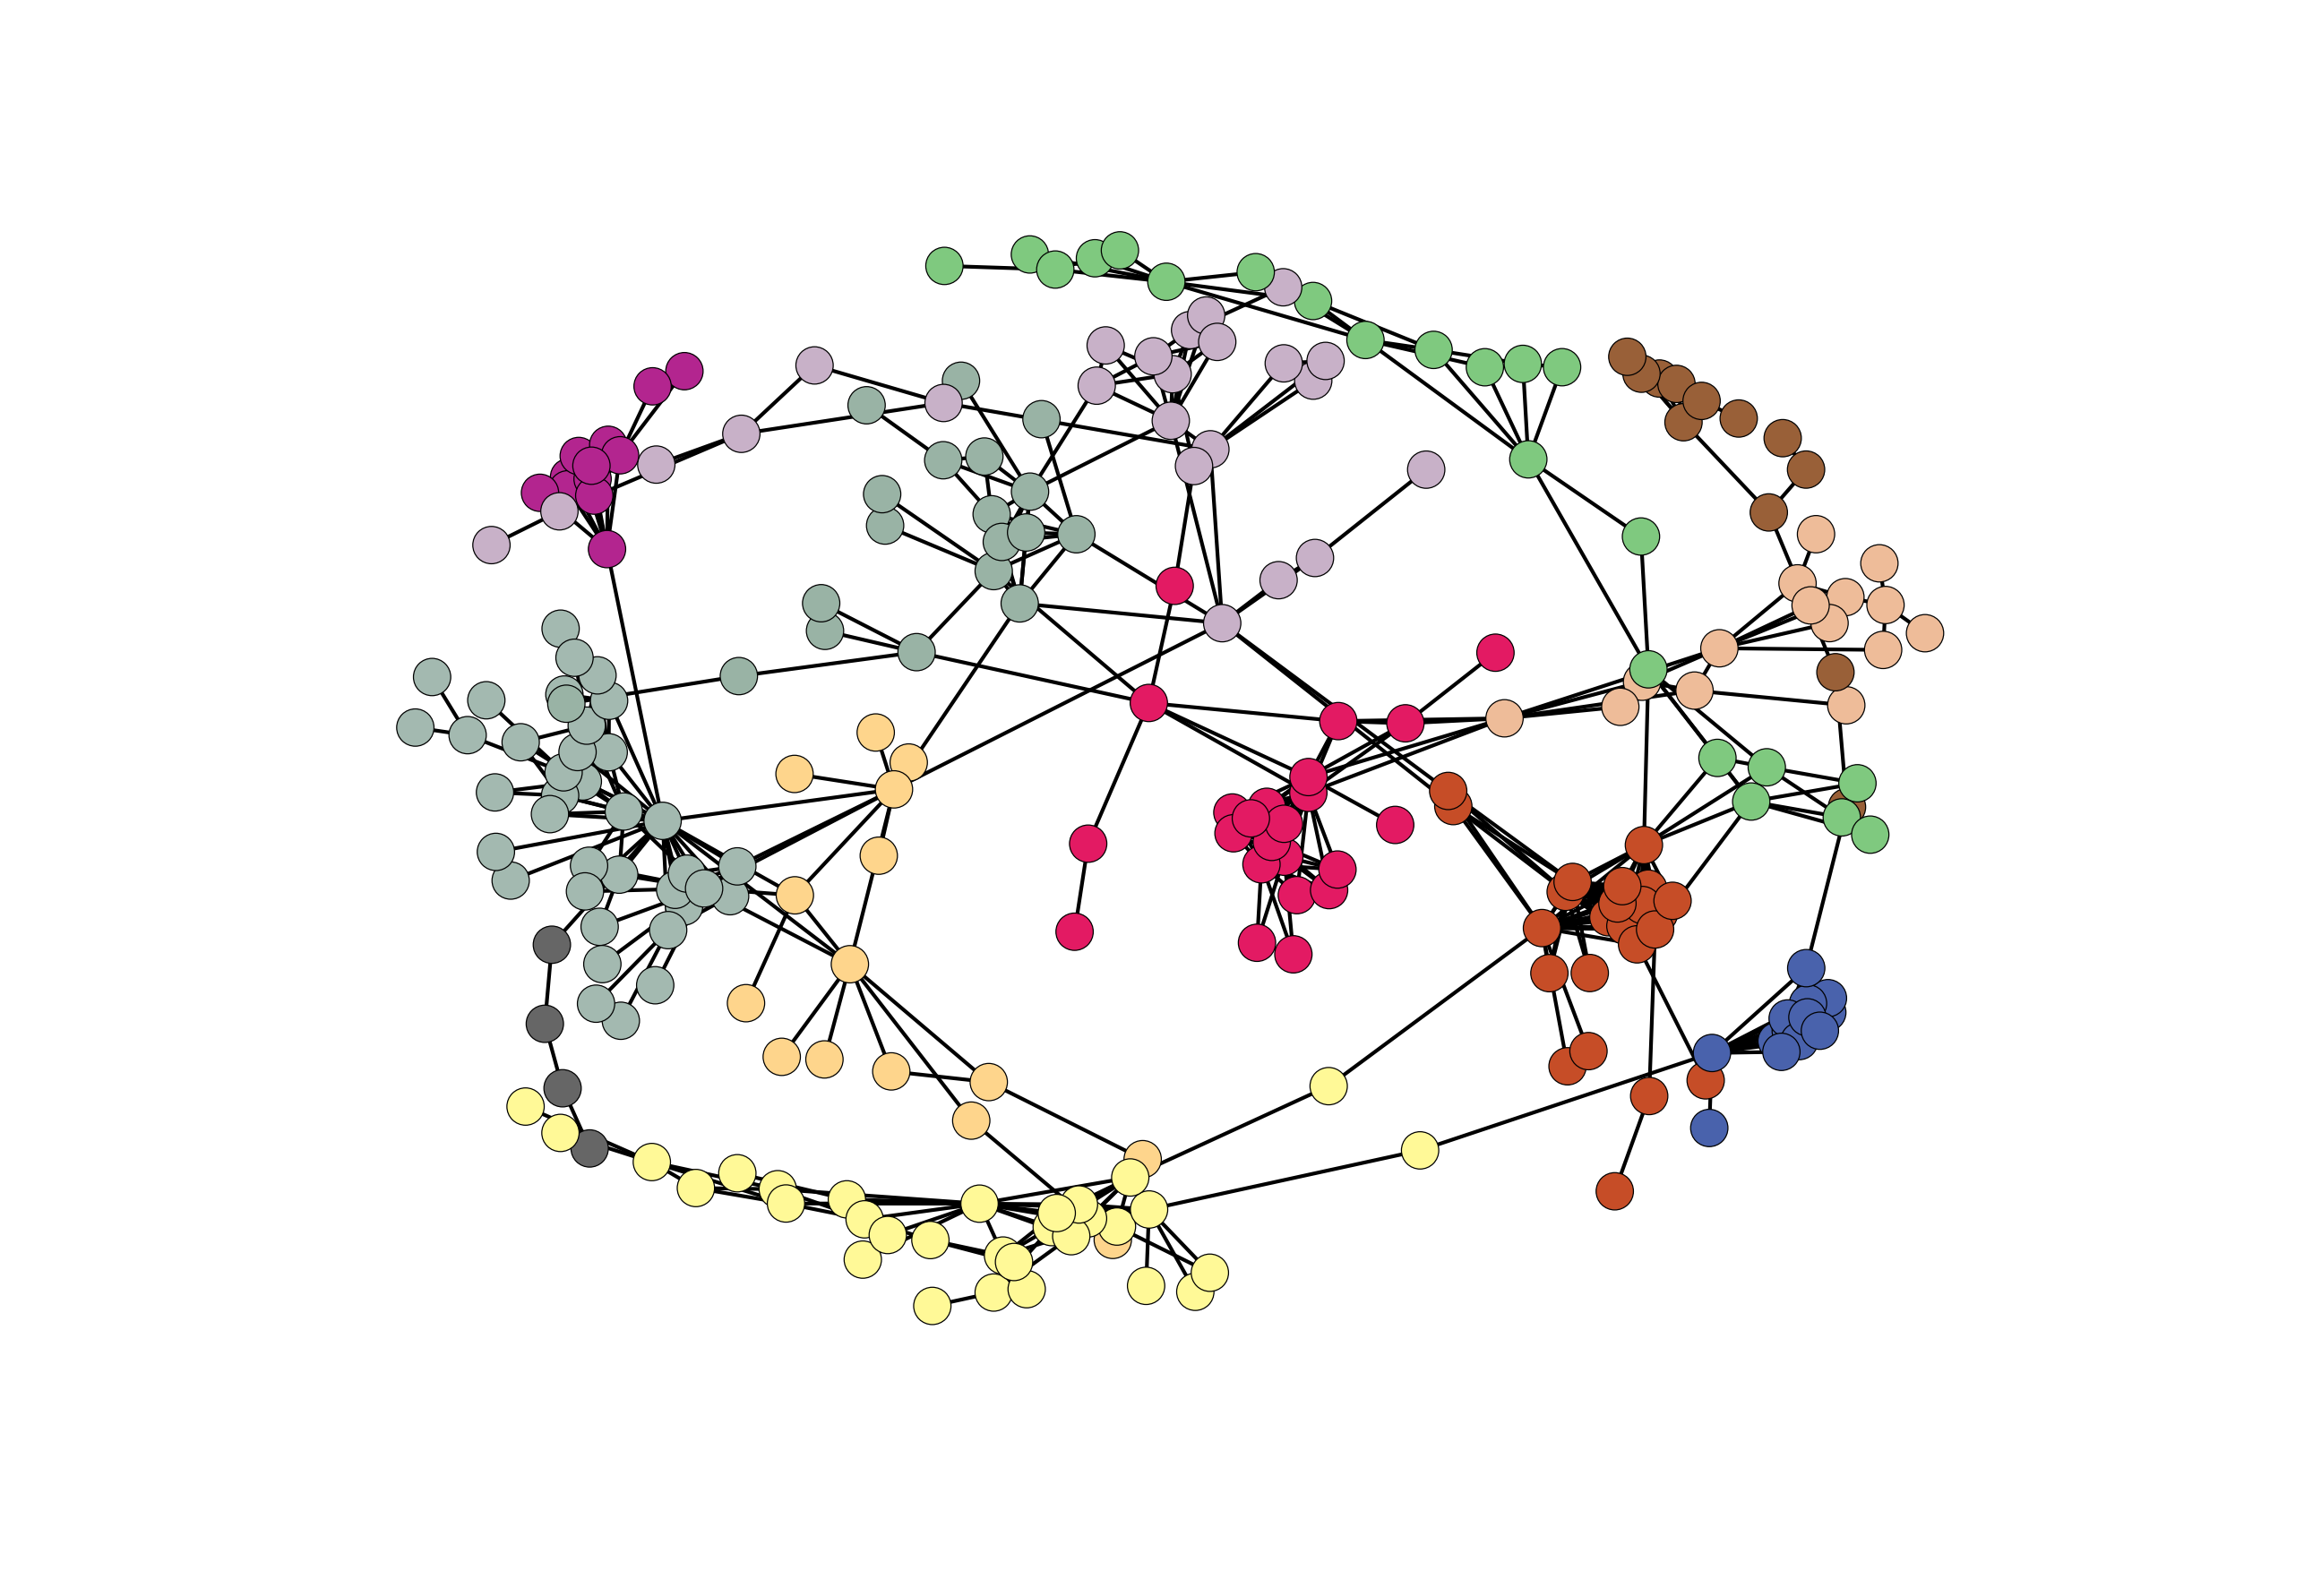

In [26]:
partition_ci = community.best_partition(giant_ci) 
modularity_ci = community.modularity(partition_ci, giant_ci) 
print('Modularity:', modularity_ci)

colors_ci = [partition_ci[n] for n in giant_ci.nodes()] 
nx.draw_spring(giant_ci, node_color=colors_ci, with_labels = False, cmap=plt.cm.Accent, node_size = 100)
plt.savefig('figures/network_coinvestigators.pdf')

We can identify 10 researchers with the highest betweenness centrality scores. 

In [27]:
bet = nx.betweenness_centrality(giant_ci)
bet_df = pandas.DataFrame.from_dict([bet]).transpose()
bet_df.columns = ['betweenness']
bet_df.sort_values(by = ['betweenness'], ascending = False)[:10]

betweenness
Mi, Zetian              0.555067
Farnood, Ramin          0.423123
Botton, Gianluigi       0.403399
Kortschot, Mark         0.345576
Sain, Mohini            0.341042
Kherani, Nazir          0.293202
Wilkinson, David        0.283616
Ruda, Harry             0.256005
VandeVen, Theodorus     0.238875
Hill, Reghan            0.238875

In [28]:
inst = nserc_grants.networkCoInvestigatorInstitution() 
print(mk.graphStats(inst))

Nodes: 5489
Edges: 32552
Isolates: 823
Self loops: 165
Density: 0.00216123
Transitivity: 0.17326


In [27]:
deg_inst = nx.degree_centrality(inst)
deg_inst_df = pandas.DataFrame.from_dict([deg_inst]).transpose()
deg_inst_df.columns = ['Degree Centrality']
deg_inst_df.sort_values(by = ['Degree Centrality'], ascending = False)[:15]

Degree
University of British Columbia       0.156159
University of Toronto                0.148688
University of Waterloo               0.140306
University of Alberta                0.129009
McGill University                    0.120445
UniversitÃ Laval                    0.107507
â¦cole Polytechnique de MontrÃal   0.092748
University of Calgary                0.090561
University of Ottawa                 0.085459
Queen's University                   0.083273
McMaster University                  0.074708
University of Guelph                 0.069606
Carleton University                  0.067238
University of Western Ontario        0.066509
UniversitÃ de Sherbrooke            0.063411
National Research Council of Canada  0.061407
University of New Brunswick          0.061042
Simon Fraser University              0.060860
Dalhousie University                 0.060678
University of Saskatchewan           0.060496

In [29]:
bet_inst = nx.betweenness_centrality(inst)
bet_inst_df = pandas.DataFrame.from_dict([bet_inst]).transpose()
bet_inst_df.columns = ['Betweenness Centrality']
bet_inst_df.sort_values(by = ['Betweenness Centrality'], ascending = False)[:15]

Betweenness Centrality
University of British Columbia                    0.089495
University of Waterloo                            0.075208
University of Toronto                             0.070859
University of Alberta                             0.068945
McGill University                                 0.052890
UniversitÃ Laval                                 0.040452
University of Calgary                             0.039391
University of Ottawa                              0.031459
University of Guelph                              0.029873
Ryerson University                                0.029241
Simon Fraser University                           0.028959
â¦cole Polytechnique de MontrÃal                0.028605
McMaster University                               0.027326
University of Manitoba                            0.026627
Dalhousie University                              0.026114

In [30]:
eig_inst = nx.degree_centrality(inst)
eig_inst_df = pandas.DataFrame.from_dict([eig_inst]).transpose()
eig_inst_df.columns = ['Eigenvector Centrality']
eig_inst_df.sort_values(by = ['Eigenvector Centrality'], ascending = False)[:15]

Eigenvector Centrality
University of British Columbia                    0.156159
University of Toronto                             0.148688
University of Waterloo                            0.140306
University of Alberta                             0.129009
McGill University                                 0.120445
UniversitÃ Laval                                 0.107507
â¦cole Polytechnique de MontrÃal                0.092748
University of Calgary                             0.090561
University of Ottawa                              0.085459
Queen's University                                0.083273
McMaster University                               0.074708
University of Guelph                              0.069606
Carleton University                               0.067238
University of Western Ontario                     0.066509
UniversitÃ de Sherbrooke                         0.063411

# One-Mode Networks (e.g. Keyword Co-Occurance)

Going back to the information science and bibliometrics `record collection`...

In [31]:
keywords = RC1014.networkOneMode('keywords')
print(mk.graphStats(keywords))

Nodes: 2950
Edges: 31524
Isolates: 19
Self loops: 0
Density: 0.00724727
Transitivity: 0.144872


In [32]:
mk.dropEdges(keywords, minWeight = 10, dropSelfLoops = True) 
mk.dropNodesByDegree(keywords, minDegree = 1, useWeight = False)

keywordsGiant = max(nx.connected_component_subgraphs(keywords), key=len)
print(mk.graphStats(keywordsGiant))

Nodes: 83
Edges: 221
Isolates: 0
Self loops: 0
Density: 0.0649427
Transitivity: 0.203002


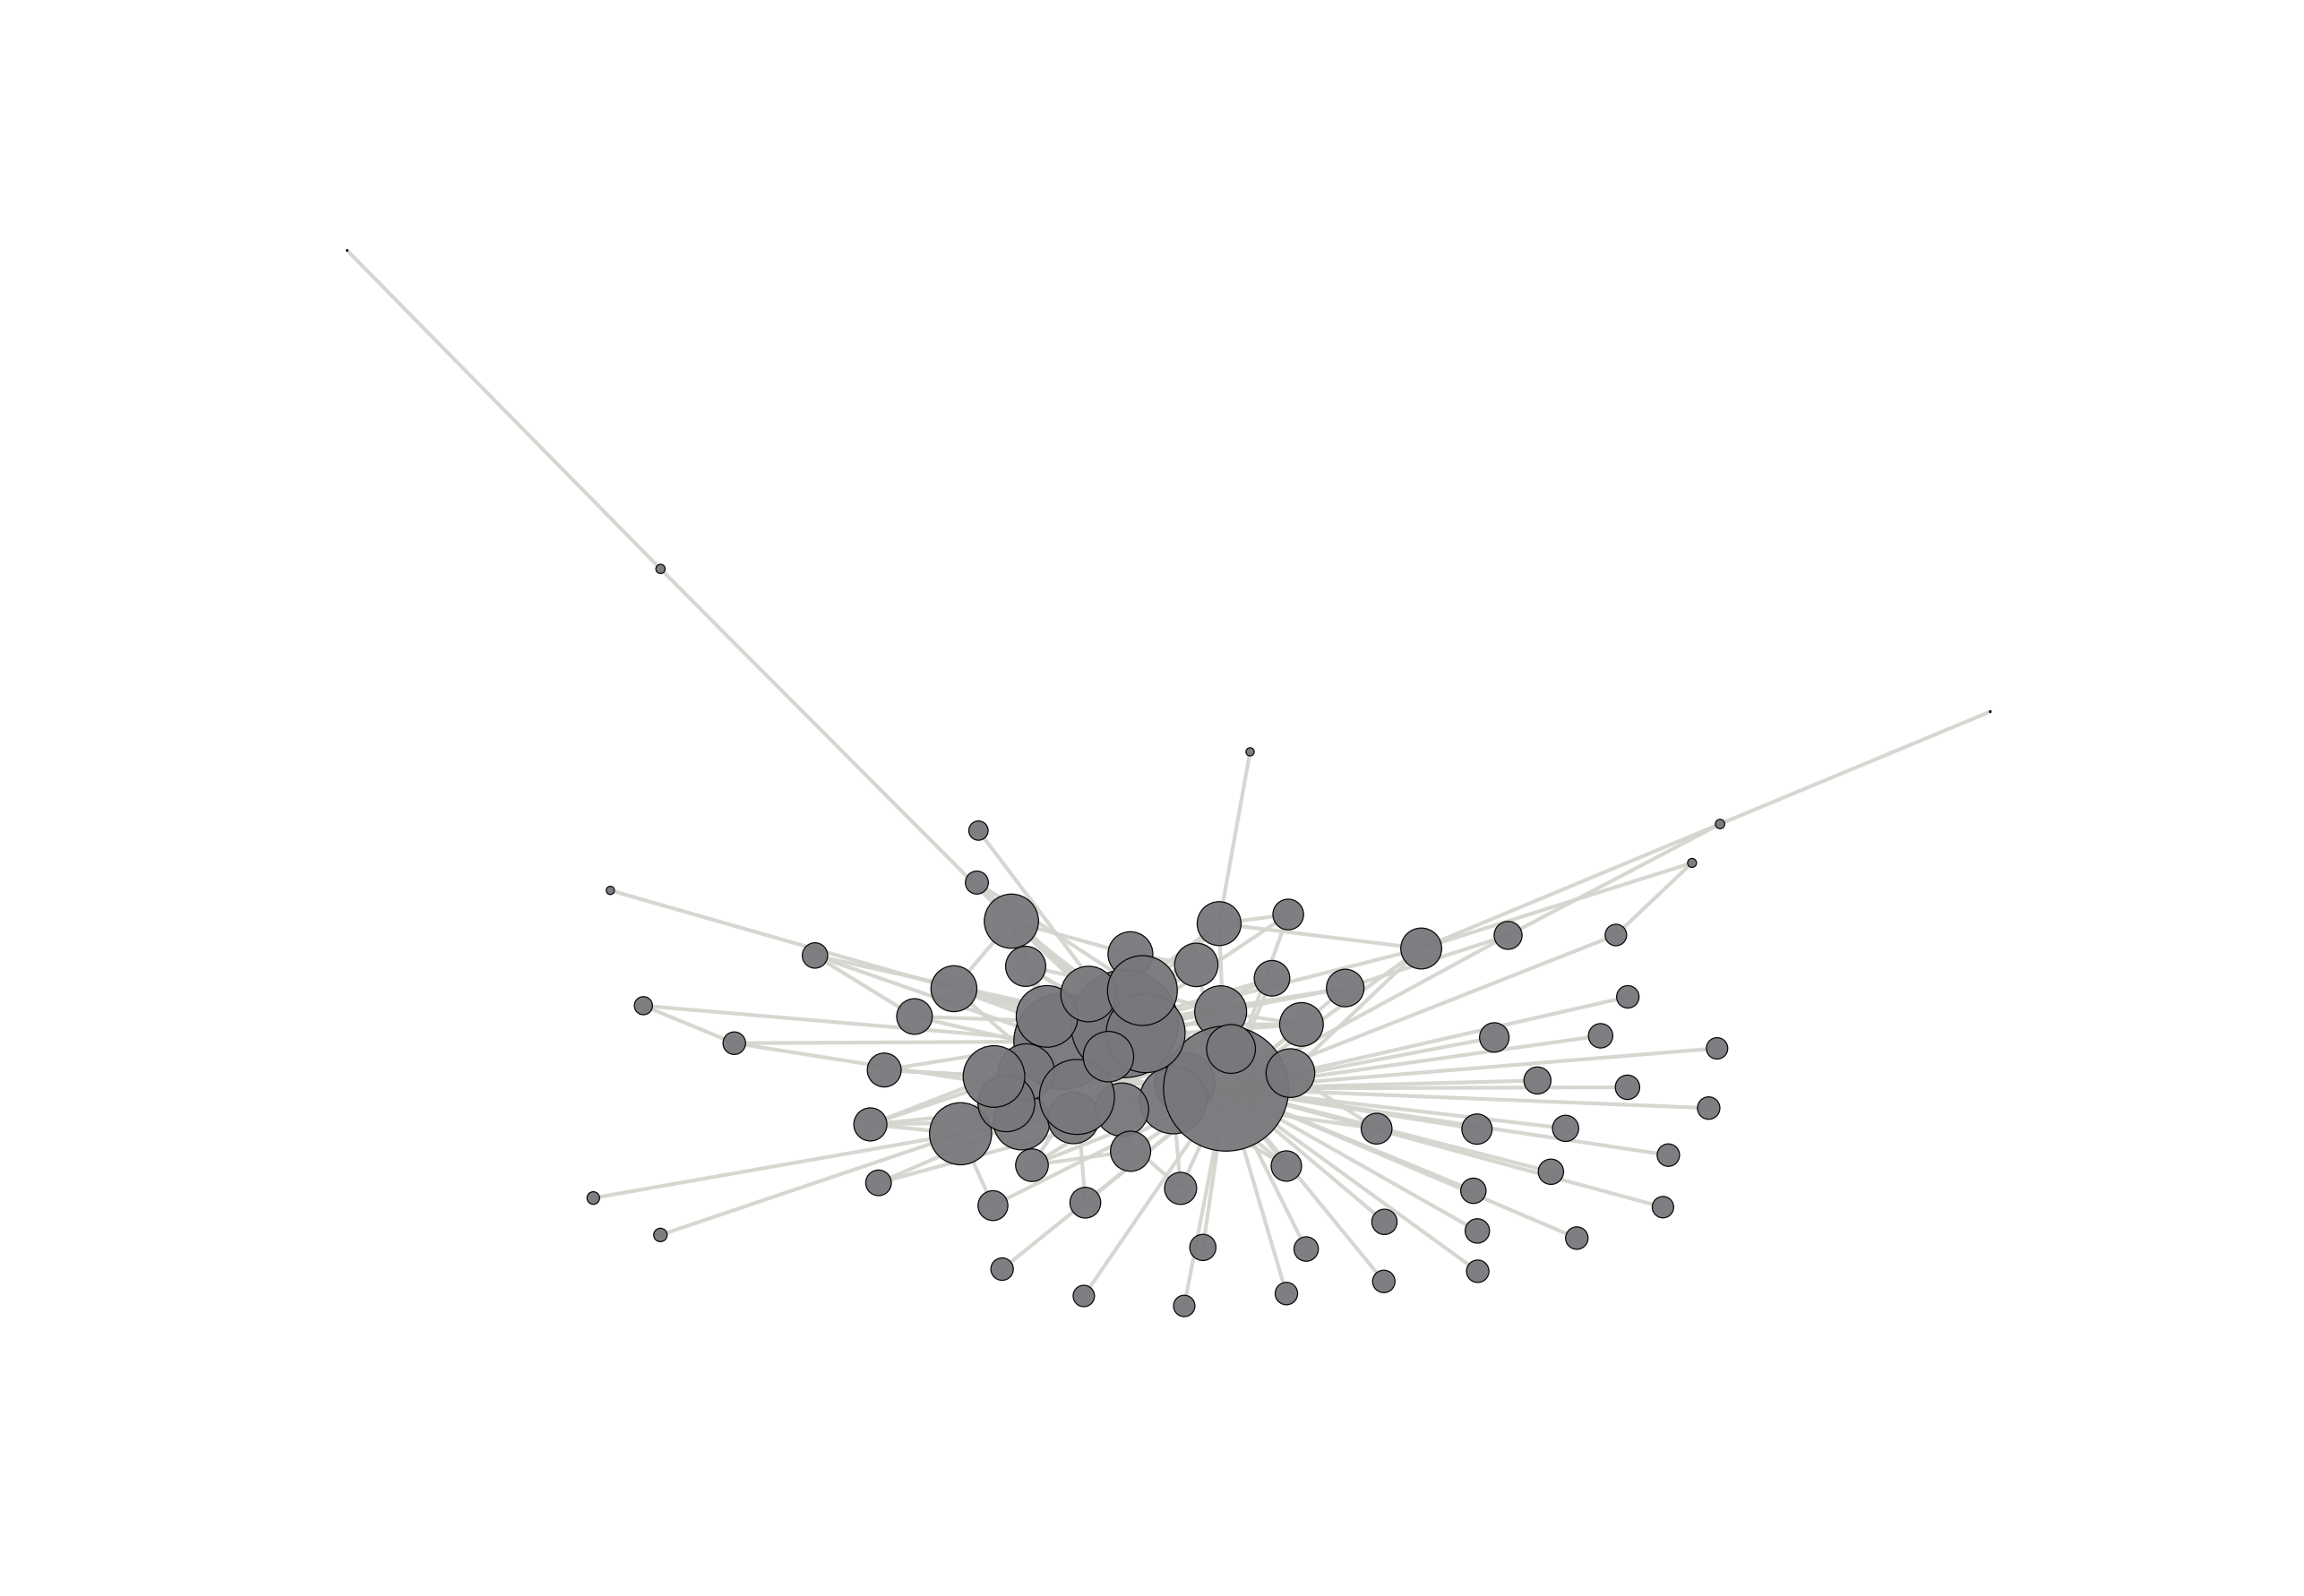

In [33]:
eig = nx.eigenvector_centrality(keywordsGiant)
size = [2000 * eig[node] for node in keywordsGiant]

nx.draw_spring(keywordsGiant, with_labels = False, node_size = size, 
               node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_keywords.pdf')

# Two-Mode Networks

In [35]:
two_mode = RC1014.networkTwoMode('keywords', 'authorsFull') 
mk.dropEdges(two_mode, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(two_mode, minDegree = 1, useWeight = False)

two_mode = max(nx.connected_component_subgraphs(two_mode), key=len)
print(mk.graphStats(two_mode))

Nodes: 316
Edges: 622
Isolates: 0
Self loops: 0
Density: 0.0124975
Transitivity: 0


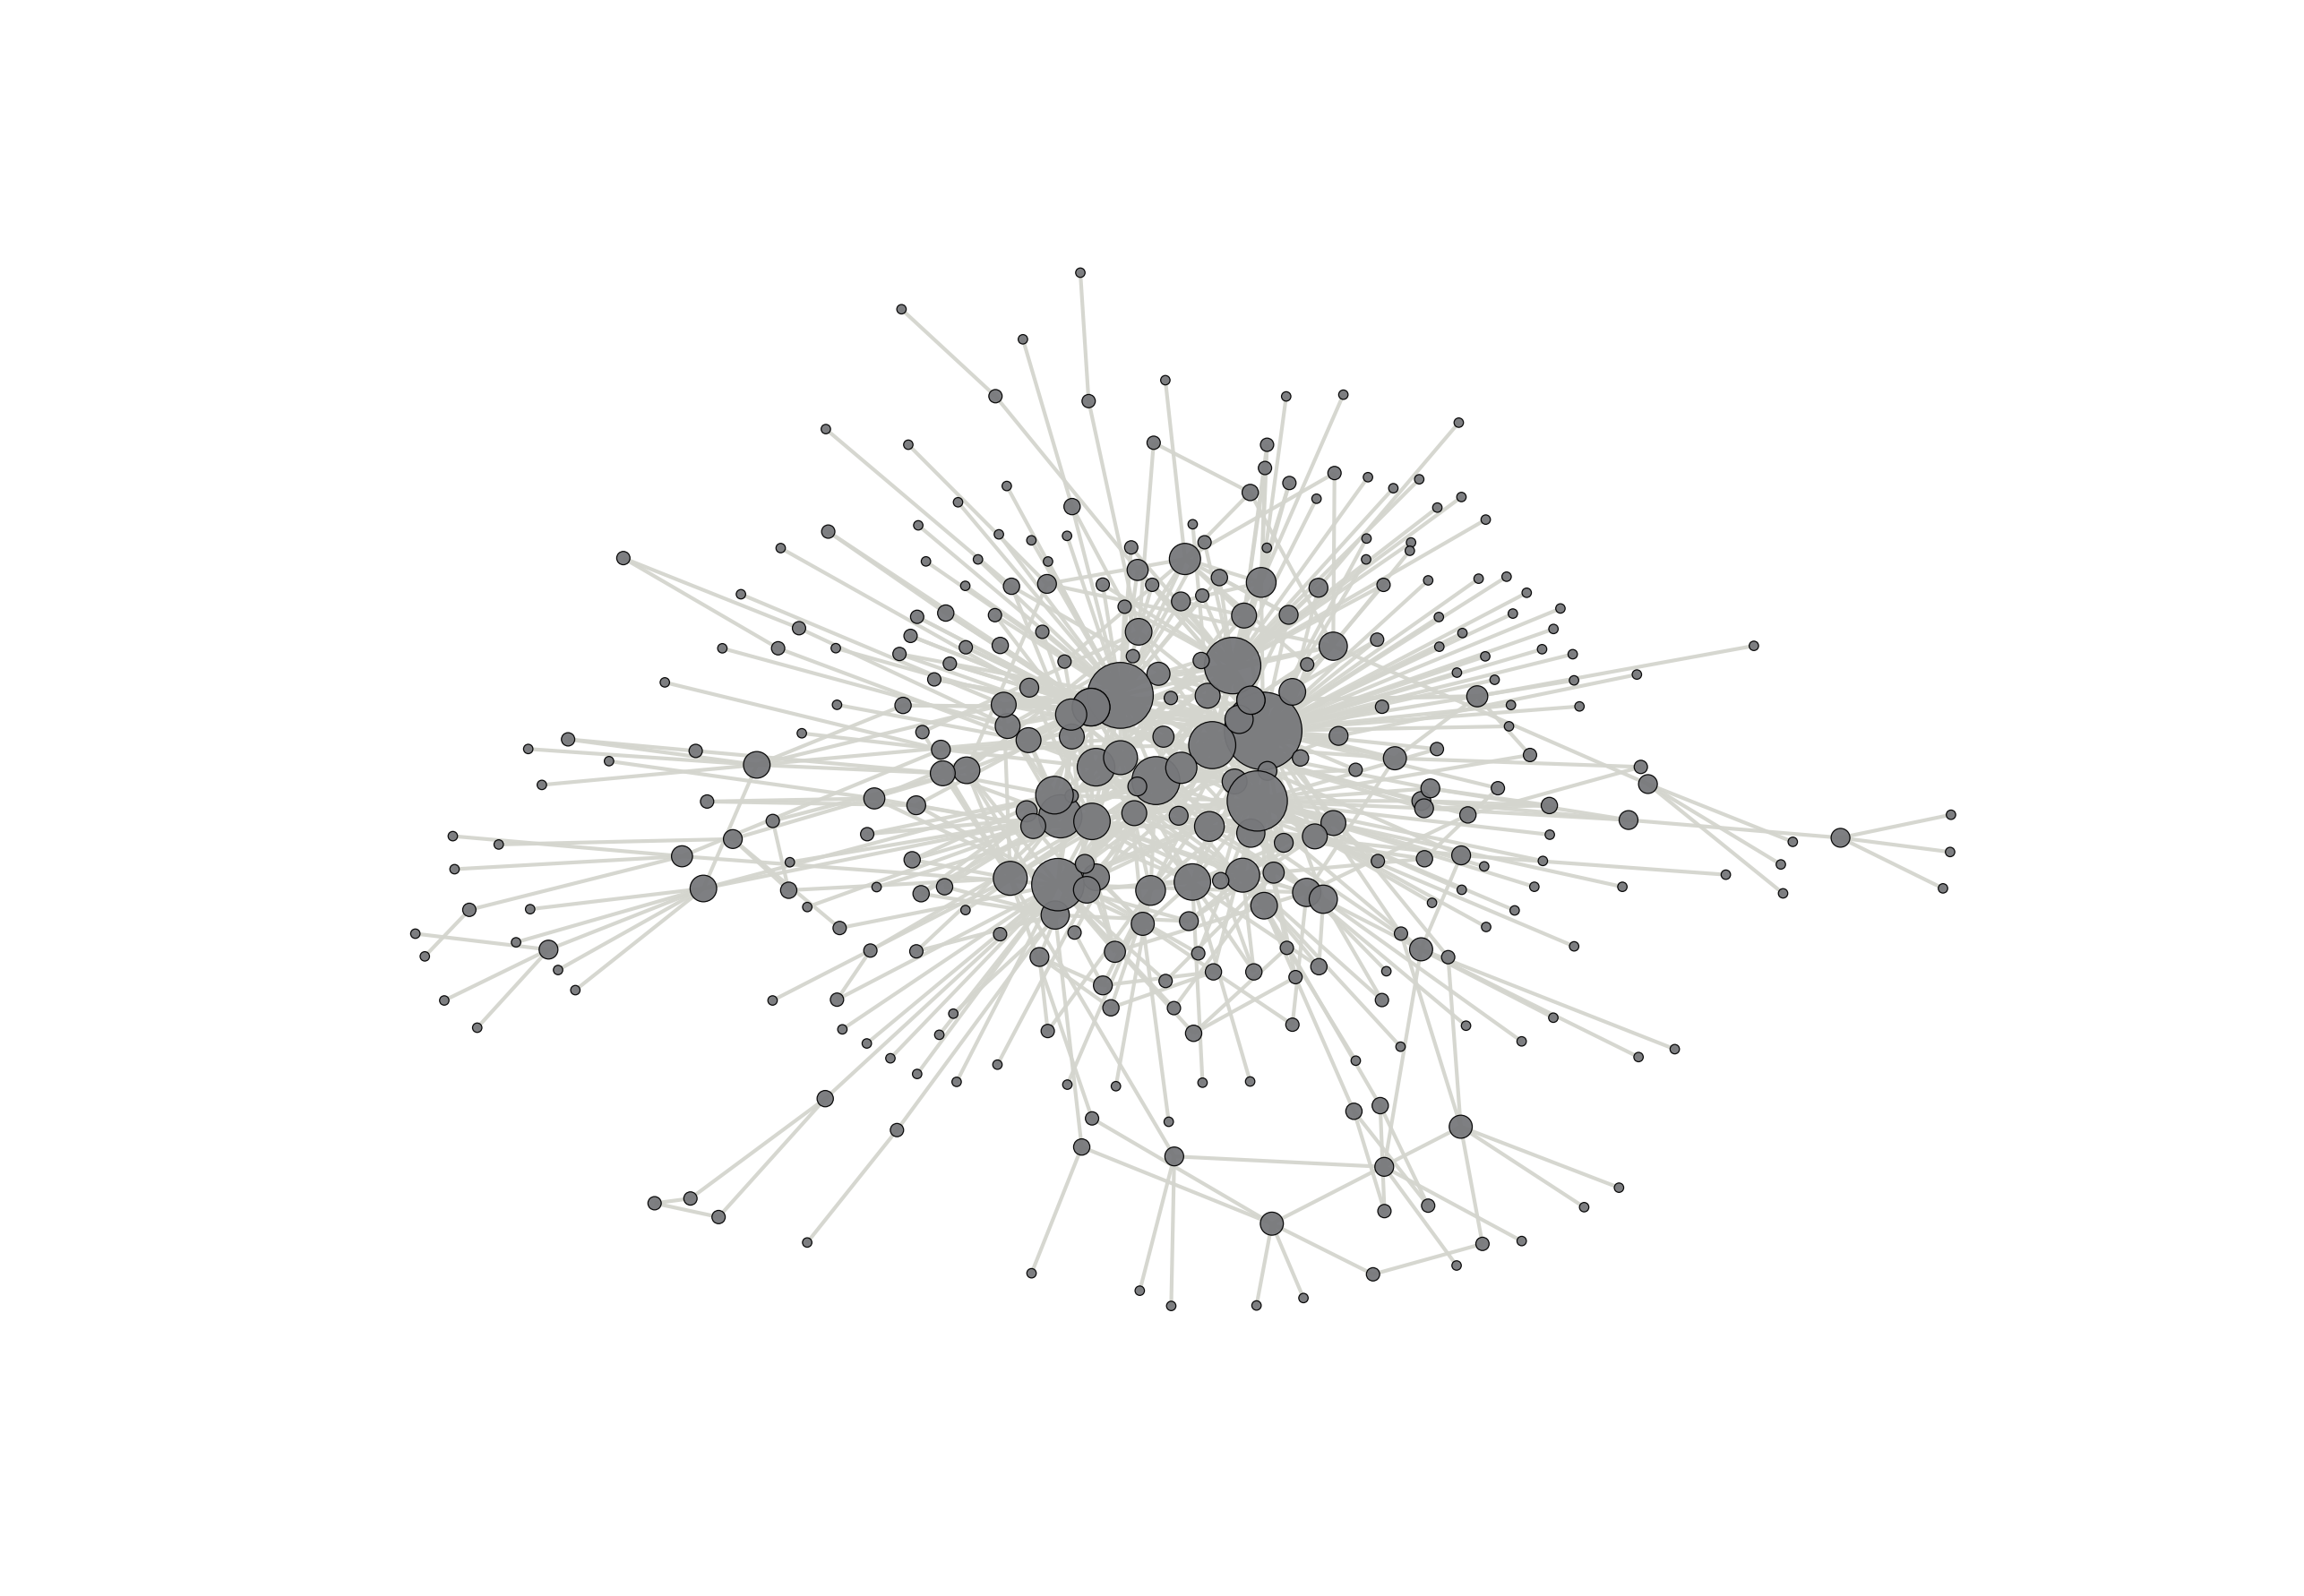

In [37]:
deg = nx.degree_centrality(two_mode)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(two_mode, with_labels = False, node_size = size, 
               node_color = '#77787B', edge_color = "#D4D5CE", alpha = .95)

# Multi-Level Networks

In [38]:
multilevel = RC1014.networkMultiLevel('keywords', 'authorsFull')
mk.dropEdges(multilevel, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(multilevel, minDegree = 1, useWeight = False)

multilevelGiant = max(nx.connected_component_subgraphs(multilevel), key=len)
print(mk.graphStats(multilevelGiant))

Nodes: 660
Edges: 3001
Isolates: 0
Self loops: 0
Density: 0.0137996
Transitivity: 0.187327


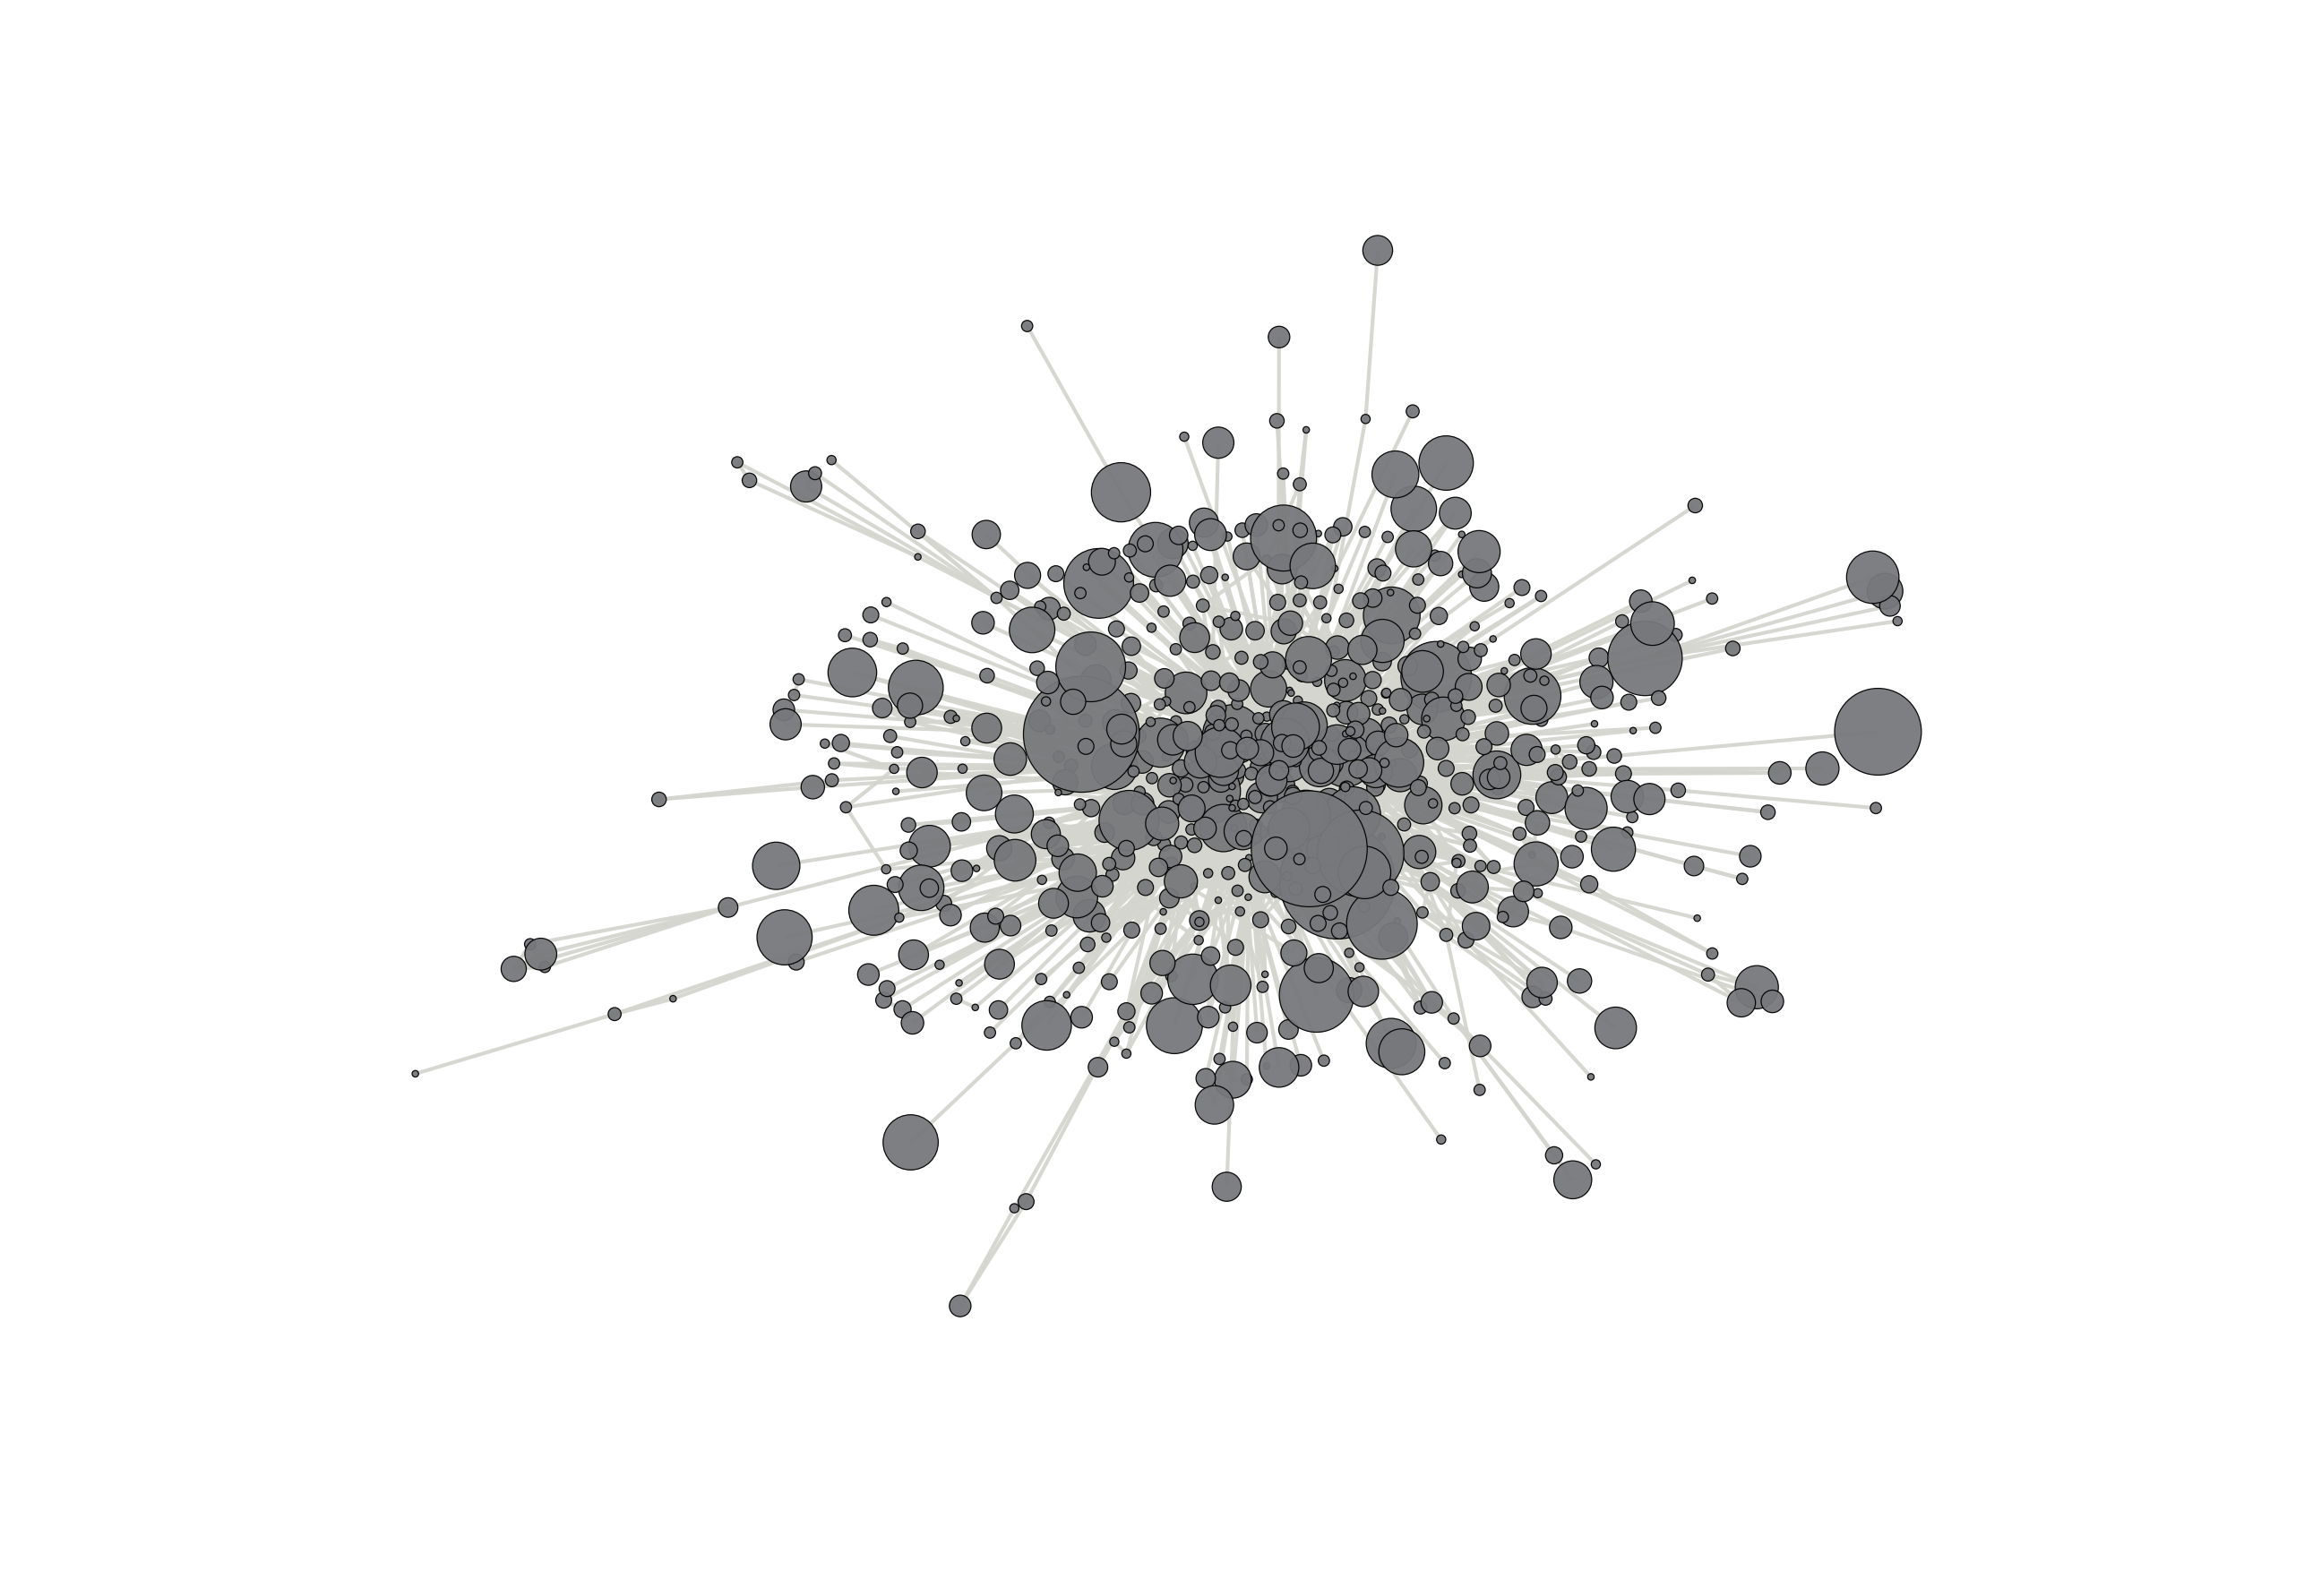

In [40]:
deg = nx.degree_centrality(multilevelGiant)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(multilevelGiant, with_labels = False, node_size = size, 
               node_color = '#77787B', edge_color = "#D4D5CE", alpha = .95)

# Writing Networks to Disk

In [41]:
mk.writeGraph(inst , 'generated_datasets/institutional_collaboration_network/')

# Interactive Network Visualizations with *mkD3*

To change the type of network that is being visualized, you can change two variables in the next cell.
- **`networkType`** should be set to `Citation`, `CoCitation`, or `CoAuthor`.
- **`nodeType`** should be set to `full`, `author`, `journal`, or `year`. (`full` nodes are individual articles or books)

In [36]:
# Variables to Set
# ****************
networkType = "CoCitation"
nodeType = "full"

# Create the Network
# ******************
if networkType == "CoCitation":
    net = RC1014.networkCoCitation(nodeType = nodeType, coreOnly=True)
    directed = False
elif networkType == "CoAuthor":
    net = RC1014.networkCoAuthor()
    directed = False
elif networkType == "Citation":
    net = RC1014.networkCitation(nodeType=nodeType, coreOnly=True)
    directed = True
else:
    print("Please ensure networkType has been set to one of the accepted values")

# Simplify the Network
# ********************
mk.dropEdges(net, minWeight = 2, dropSelfLoops = True) 
net.remove_nodes_from(nx.isolates(net)) # Remove nodes which are isolates


# Add Node Data
# *************
if not directed: 
    partition = community.best_partition(net)
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        comm = partition[n]
        net.add_node(n, community=comm, betweenness=betw)
else: 
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        net.add_node(n, betweenness=betw)

mk.writeGraph(net, "generated_datasets/network")

# Create Link to Heatmap
from IPython.display import display, HTML
display(HTML('<a href="mkD3_static/network.html target="_blank"">Open network graph.</a>'))